# Sommaire :
<a href="#C1">1. Importation des données</a>


<a href="#C2">2 : 1er essai : données RFM + Kmeans</a>

     2.1 Standardisation des données
     2.2 Méthode du coude
     2.3 Clustering ( 4 clusters )
     2.4 Affichage des métriques
     
    
<a href="#C2">3 : 2ème essai : données RFM + DBSCAN</a>

     2.1 Création de quantiles pour échantillonage stratifié
     2.2 Standardisation des données
     2.3 Grid search
     2.4 Affichage des métriques


<a href="#C2">2 : 3ème essai : données RFM avec reviews + KMEANS</a>

     2.1 Standardisation des données
     2.2 Méthode du coude
     2.3 Clustering ( 5 clusters )
     2.4 Affichage des métriques
     
    
<a href="#C2">3 : 4ème essai : données RFM avec reviews + DBSCAN</a>

     2.1 Création de quantiles pour échantillonage stratifié
     2.2 Standardisation des données
     2.3 Grid search
     2.4 Affichage des métriques

<a href="#C2">2 : 5ème essai : données RFM avec reviews + KMEANS</a>

     2.1 Standardisation des données
     2.2 Méthode du coude
     2.3 Clustering ( 4 clusters )
     2.4 Affichage des métriques
     
    
<a href="#C2">3 : 6ème essai : données RFM avec reviews + DBSCAN</a>

     2.1 Création de quantiles pour échantillonage stratifié
     2.2 Standardisation des données
     2.3 Grid search
     2.4 Affichage des métriques



# <a name="C1">1. Importation des données</a>

In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import missingno as msno
from datetime import timedelta
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import axes3d  
from sklearn import preprocessing
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")







In [2]:
ds = pd.read_csv('ds_rfm_w_review_w_state.csv')

In [3]:
ds_rfm = ds

In [4]:
ds_rfm

,customer_unique_id,Recency,Frequency,Monetary,review,area_type_campagne,area_type_ville
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,5.0,True,False
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,4.0,True,False
2,0000f46a3911fa3c0805444483337064,537,1,86.22,3.0,True,False
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,4.0,True,False
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,5.0,True,False
...,...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,2067.42,5.0,True,False
93354,fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58,4.0,True,False
93355,ffff371b4d645b6ecea244b27531430a,568,1,112.46,5.0,True,False
93356,ffff5962728ec6157033ef9805bacc48,119,1,133.69,5.0,True,False


In [5]:
ds_rfm = ds_rfm.drop(columns=['customer_unique_id','review','area_type_campagne','area_type_ville'])

## 1er essai : données RFM + Kmeans

## Standardisation des données

In [6]:


# Sélection des features  pour le clustering
X = ds_rfm[['Recency', 'Frequency', 'Monetary']]

# Initialisation du scaler
scaler = StandardScaler()

# Normalisation 
X_standardized = scaler.fit_transform(X)

# Création d'un nouveau DataFrame avec les features standardisées
ds_rfm_standardized = pd.DataFrame(X_standardized, columns=['Recency', 'Frequency', 'Monetary'])


## Méthode du coude

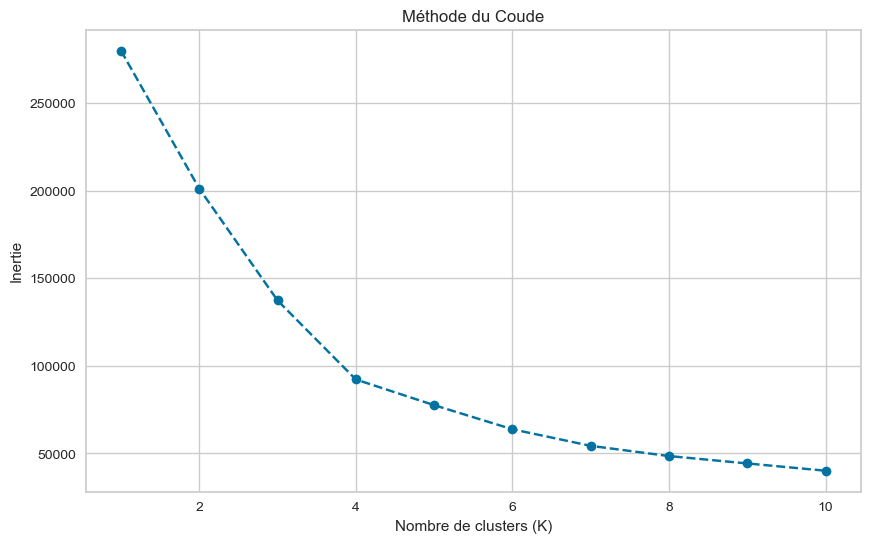

In [7]:


# Sélection des features pour le clustering
X = ds_rfm_standardized[['Recency', 'Frequency', 'Monetary']]

# Calcul de l'inertie pour différentes valeurs de K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Tracé de la courbe du coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie')
plt.title('Méthode du Coude')
plt.grid(True)
plt.show()


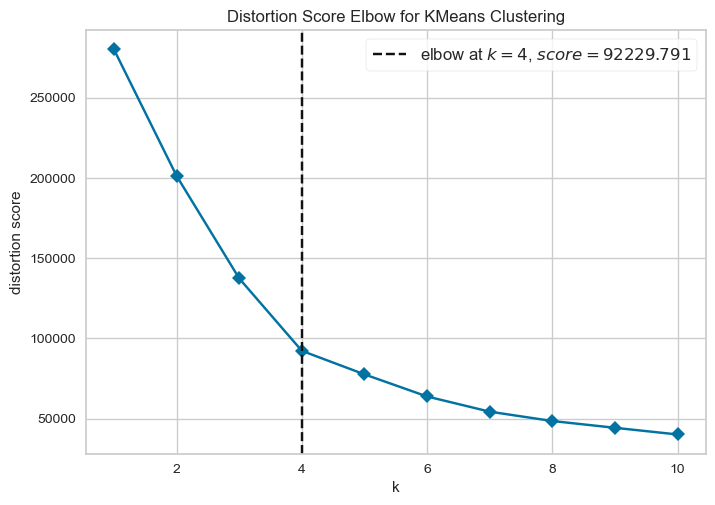

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:


# Sélection des features pour le clustering
X = ds_rfm_standardized[['Recency', 'Frequency', 'Monetary']]

# Initialisation du  KMeans
model = KMeans(random_state=42)

# Tracer la courbe du coude pour déterminer le nombre optimal de clusters (K)
visualizer = KElbowVisualizer(model, k=(1, 11), timings=False)
visualizer.fit(X)
visualizer.show()


In [9]:
#creation d'une copie du dataset poury appliquer le clustering
ds_rfm_clusterized = ds_rfm

## Clustering ( 4 clusters )

In [10]:

# Initialisation du modèle KMeans avec 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42)

# Ajustement du modèle aux données
kmeans_4.fit(ds_rfm_standardized)

#affectation des clusters au dataset
ds_rfm_clusterized['Cluster'] = kmeans_4.labels_


## Affichage des métriques

## Score silhouette

In [11]:
# Calcul du coefficient de silhouette pour les clusters attribués
silhouette_avg = silhouette_score(ds_rfm_standardized, kmeans_4.labels_)

# Affichage du coefficient de silhouette moyen
print( silhouette_avg)


0.48890889488114736


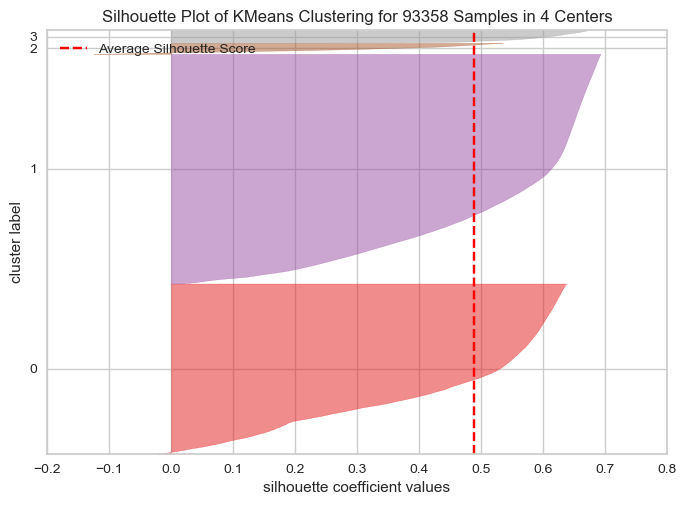

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 93358 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [12]:
#affichage des clusters via silhouette visualizer
visualizer = SilhouetteVisualizer(kmeans_4)
visualizer.fit(ds_rfm_standardized)    # 
visualizer.poof()

## Boxplots

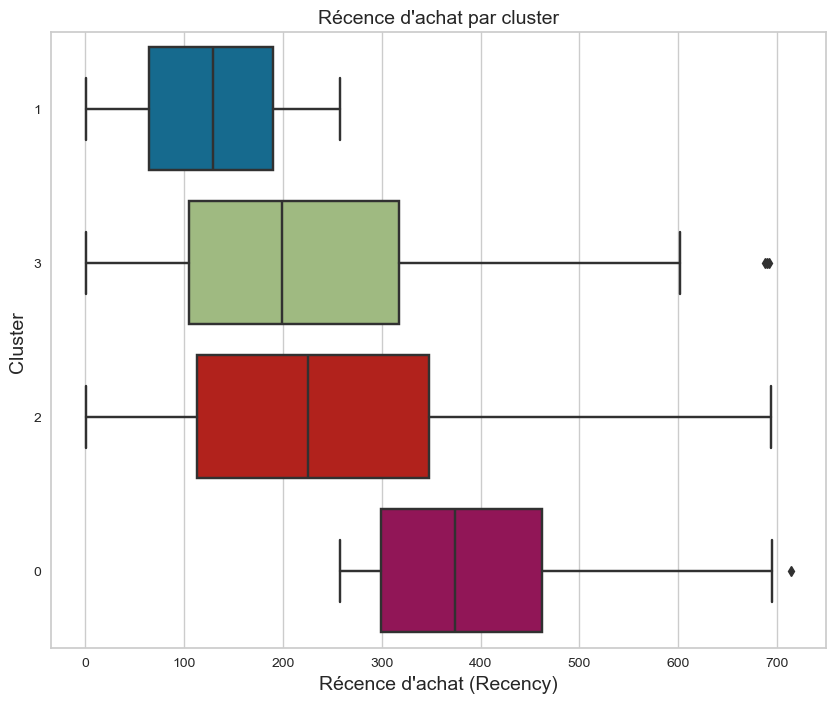

In [13]:
# Boxplot de la Récence par cluster
ordre_cluster = ds_rfm_clusterized.groupby('Cluster')['Recency'].median().sort_values().index
plt.figure(figsize=(10,8))
plt.title("Récence d'achat par cluster", fontsize=14)
sns.boxplot(x=ds_rfm_clusterized['Recency'], 
            y=ds_rfm_clusterized['Cluster'], 
            showfliers=True,
            orient='h', 
            order=ordre_cluster,
            data=ds_rfm_clusterized)
plt.xlabel("Récence d'achat (Recency)",fontsize=14)
plt.ylabel('Cluster ',fontsize=14)
plt.show()

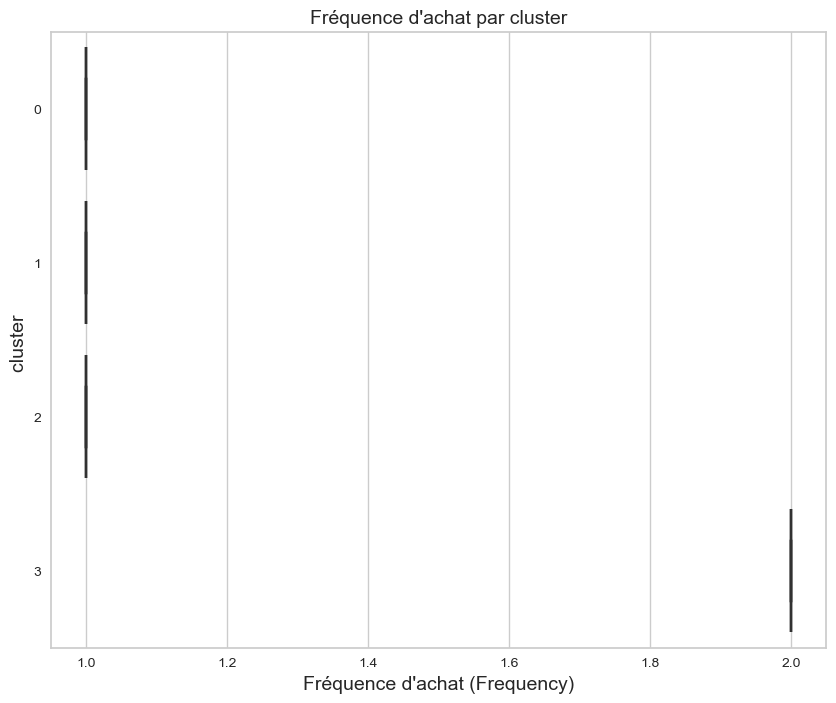

In [14]:
# Boxplot de la Fréquence par cluster
ordre_cluster = ds_rfm_clusterized.groupby('Cluster')['Frequency'].median().sort_values().index
plt.figure(figsize=(10,8))
plt.title("Fréquence d'achat par cluster", fontsize=14)
sns.boxplot(x=ds_rfm_clusterized['Frequency'], 
            y=ds_rfm_clusterized['Cluster'], 
            showfliers=False,
            orient='h', 
            order=ordre_cluster,
            data=ds_rfm_clusterized)
plt.xlabel("Fréquence d'achat (Frequency)",fontsize=14)
plt.ylabel('cluster ',fontsize=14)
plt.show()

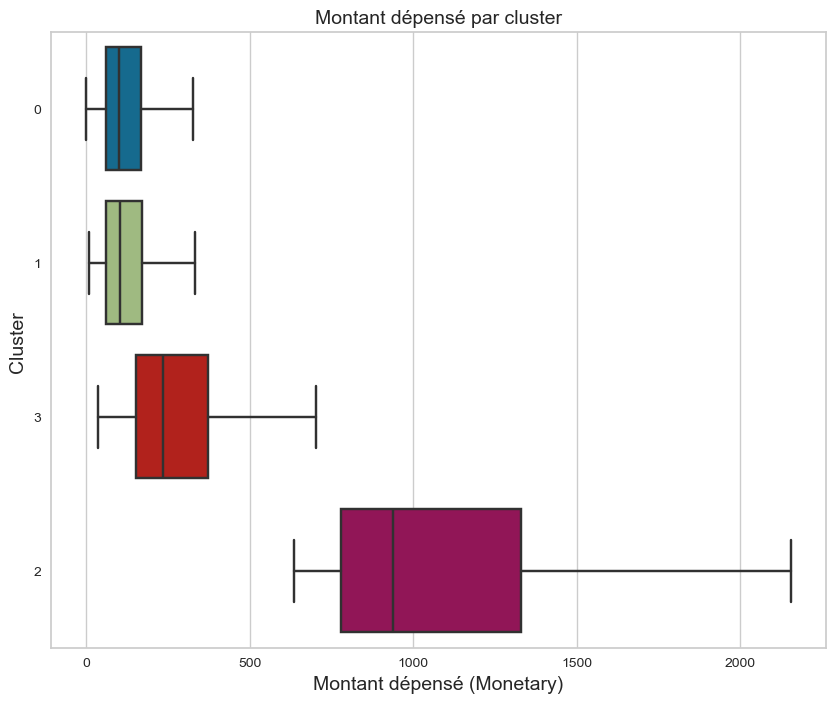

In [15]:
# Boxplot du Montant dépensé par cluster

ordre_cluster = ds_rfm_clusterized.groupby('Cluster')['Monetary'].median().sort_values().index
plt.figure(figsize=(10,8))
plt.title("Montant dépensé par cluster", fontsize=14)
sns.boxplot(x=ds_rfm_clusterized['Monetary'], 
            y=ds_rfm_clusterized['Cluster'], 
            showfliers=False,
            orient='h', 
            order=ordre_cluster,
            data=ds_rfm_clusterized)
plt.xlabel('Montant dépensé (Monetary)',fontsize=14)
plt.ylabel('Cluster ',fontsize=14)
plt.show()

## comparaison des moyennes

In [16]:
# Calculer les moyennes des variables RFM par cluster
clusters = ds_rfm_clusterized['Cluster'].unique()

# Creation d'un dataframe vide pour stocker les moyennes
results_monetary = pd.DataFrame(columns=['Cluster1', 'Cluster2', 'Mean1', 'Mean2', 'T-score_monetary', 'p-value'])

for i in range(len(clusters)):
    for j in range(i+1, len(clusters)):
        
        cluster_data_i = ds_rfm_clusterized[ds_rfm_clusterized['Cluster'] == clusters[i]]['Monetary']
        cluster_data_j = ds_rfm_clusterized[ds_rfm_clusterized['Cluster'] == clusters[j]]['Monetary']
        
        #  t-test
        t_score, p_value = ttest_ind(cluster_data_i, cluster_data_j)
        
        # Calcul des moyennes
        mean_i = cluster_data_i.mean()
        mean_j = cluster_data_j.mean()
        
        # ajout des moyennes au dataframe
        results_monetary.loc[len(results_monetary)] = [clusters[i], clusters[j], mean_i.round(), mean_j.round(), t_score.round(), p_value.round(2)]


results_monetary


,Cluster1,Cluster2,Mean1,Mean2,T-score_monetary,p-value
0,1.0,0.0,134.0,134.0,1.0,0.27
1,1.0,3.0,134.0,308.0,-75.0,0.00
2,1.0,2.0,134.0,1165.0,-278.0,0.00
3,0.0,3.0,134.0,308.0,-72.0,0.00
4,0.0,2.0,134.0,1165.0,-250.0,0.00
5,3.0,2.0,308.0,1165.0,-62.0,0.00


In [17]:

# Calculer les moyennes des variables RFM par cluster
clusters = ds_rfm_clusterized['Cluster'].unique()

# Creation d'un dataframe vide pour stocker les moyennes
results_Recency = pd.DataFrame(columns=['Cluster1', 'Cluster2', 'Mean1', 'Mean2', 'T-score_recency', 'p-value'])

for i in range(len(clusters)):
    for j in range(i+1, len(clusters)):
        
        cluster_data_i = ds_rfm_clusterized[ds_rfm_clusterized['Cluster'] == clusters[i]]['Recency']
        cluster_data_j = ds_rfm_clusterized[ds_rfm_clusterized['Cluster'] == clusters[j]]['Recency']
        
        #  t-test
        t_score, p_value = ttest_ind(cluster_data_i, cluster_data_j)
        
        # Calculate the means
        mean_i = cluster_data_i.mean()
        mean_j = cluster_data_j.mean()
        
       # ajout des moyennes au dataframe
        results_Recency.loc[len(results_Recency)] = [clusters[i], clusters[j], mean_i.round(), mean_j.round(), t_score.round(), p_value.round(2)]


results_Recency


,Cluster1,Cluster2,Mean1,Mean2,T-score_recency,p-value
0,1.0,0.0,128.0,387.0,-457.0,0.0
1,1.0,3.0,128.0,220.0,-61.0,0.0
2,1.0,2.0,128.0,240.0,-69.0,0.0
3,0.0,3.0,387.0,220.0,85.0,0.0
4,0.0,2.0,387.0,240.0,70.0,0.0
5,3.0,2.0,220.0,240.0,-5.0,0.0


In [18]:
# Calculer les moyennes des variables RFM par cluster
clusters = ds_rfm_clusterized['Cluster'].unique()

# Creation d'un dataframe vide pour stocker les moyennes
results_Frequency = pd.DataFrame(columns=['Cluster1', 'Cluster2', 'Mean1', 'Mean2', 'T-score_frequency', 'p-value'])

for i in range(len(clusters)):
    for j in range(i+1, len(clusters)):
       
        cluster_data_i = ds_rfm_clusterized[ds_rfm_clusterized['Cluster'] == clusters[i]]['Frequency']
        cluster_data_j = ds_rfm_clusterized[ds_rfm_clusterized['Cluster'] == clusters[j]]['Frequency']
        
         #  t-test
        t_score, p_value = ttest_ind(cluster_data_i, cluster_data_j)
        
        # Calculate the means
        mean_i = cluster_data_i.mean()
        mean_j = cluster_data_j.mean()
        
       # ajout des moyennes au dataframe
        results_Frequency.loc[len(results_Frequency)] = [clusters[i], clusters[j], mean_i.round(), mean_j.round(), t_score.round(),p_value.round(2)]


results_Frequency


,Cluster1,Cluster2,Mean1,Mean2,T-score_frequency,p-value
0,1.0,0.0,1.0,1.0,NaN,NaN
1,1.0,3.0,1.0,2.0,-496.0,0.0
2,1.0,2.0,1.0,1.0,-26.0,0.0
3,0.0,3.0,1.0,2.0,-427.0,0.0
4,0.0,2.0,1.0,1.0,-22.0,0.0
5,3.0,2.0,2.0,1.0,104.0,0.0


In [19]:
# Regroupement des données par cluster et calcul des moyennes pour les colonnes spécifiées
cluster_means = ds_rfm_clusterized.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

# Affichage des moyennes de chaque caractéristique pour chaque cluster
print(cluster_means)

            Recency  Frequency     Monetary
Cluster                                    
0        387.399675   1.000000   133.620977
1        128.077778   1.000000   134.429041
2        239.538652   1.014882  1164.784473
3        220.317311   2.114565   307.982508


Cluster 0 :

    Récence : Environ 387 jours depuis le dernier achat.
    Fréquence : En moyenne, chaque client a effectué un seul achat.
    Monétaire : La somme totale dépensée par les clients dans ce cluster est d'environ 134 reals.
    Interprétation : "Récents ou occasionnels avec une faible dépense"

Cluster 1 :

    Récence : Environ 128 jours depuis le dernier achat.
    Fréquence : En moyenne, chaque client a effectué un seul achat.
    Monétaire : La somme totale dépensée par les clients dans ce cluster est d'environ 134 reals.
    Interprétation : "Récents ou occasionnels avec une faible dépense"

Cluster 2 :

    Récence : Environ 239 jours depuis le dernier achat.
    Fréquence : En moyenne, chaque client a effectué un peu plus d'un achat.
    Monétaire : La somme totale dépensée par les clients dans ce cluster est d'environ 1165 reals.
    Interprétation : "Inactifs ou occasionnels, mais avec une dépense significative"

Cluster 3 :

    Récence : Environ 220 jours depuis le dernier achat.
    Fréquence : En moyenne, chaque client a effectué un peu plus de deux achats.
    Monétaire : La somme totale dépensée par les clients dans ce cluster est d'environ 308 reals.
    Interprétation : "Actifs et dépensiers"

## Histogrammes

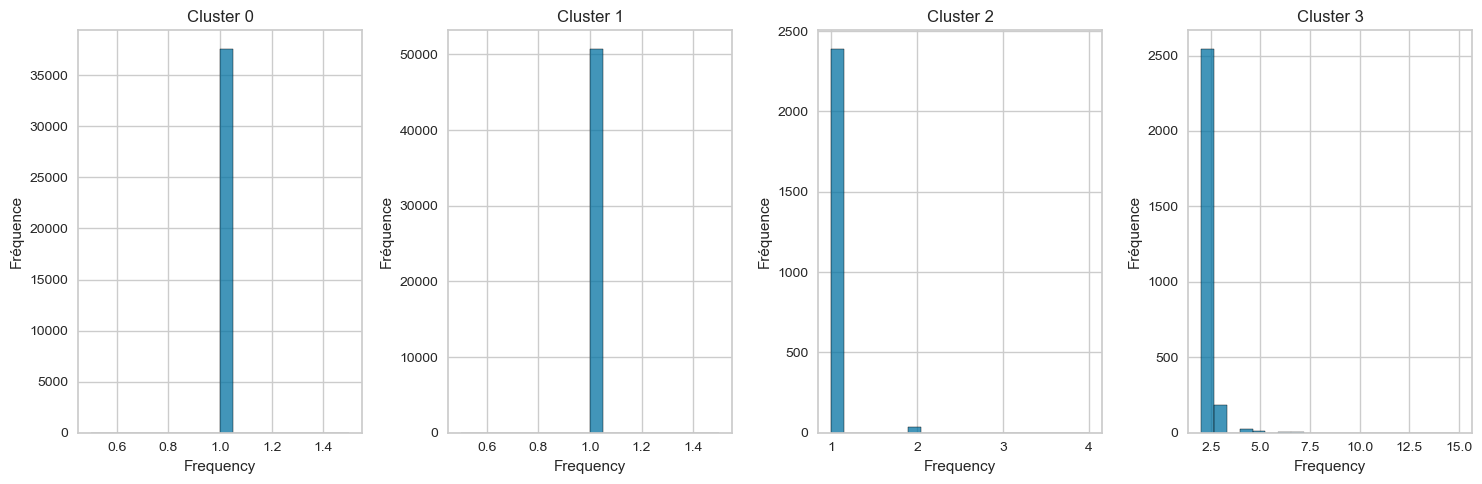

In [20]:

# Sélection de la caractéristique à visualiser
feature = 'Frequency'
n_clusters = 4  # Nombre de clusters

# Création de la grille de sous-graphiques
fig, axes = plt.subplots(nrows=1, ncols=n_clusters, figsize=(15, 5))

# Parcours de chaque cluster
for j in range(n_clusters):
    # Filtrer le jeu de données pour le cluster spécifique
    cluster_data = ds_rfm_clusterized[ds_rfm_clusterized['Cluster'] == j]
    
    # Tracer l'histogramme pour la caractéristique et le cluster spécifiques
    sns.histplot(cluster_data[feature], bins=20, ax=axes[j])
    
    # Ajouter un titre pour chaque sous-graphique
    axes[j].set_title(f'Cluster {j}')
    axes[j].set_xlabel(feature)
    axes[j].set_ylabel('Fréquence')


plt.tight_layout()


plt.show()






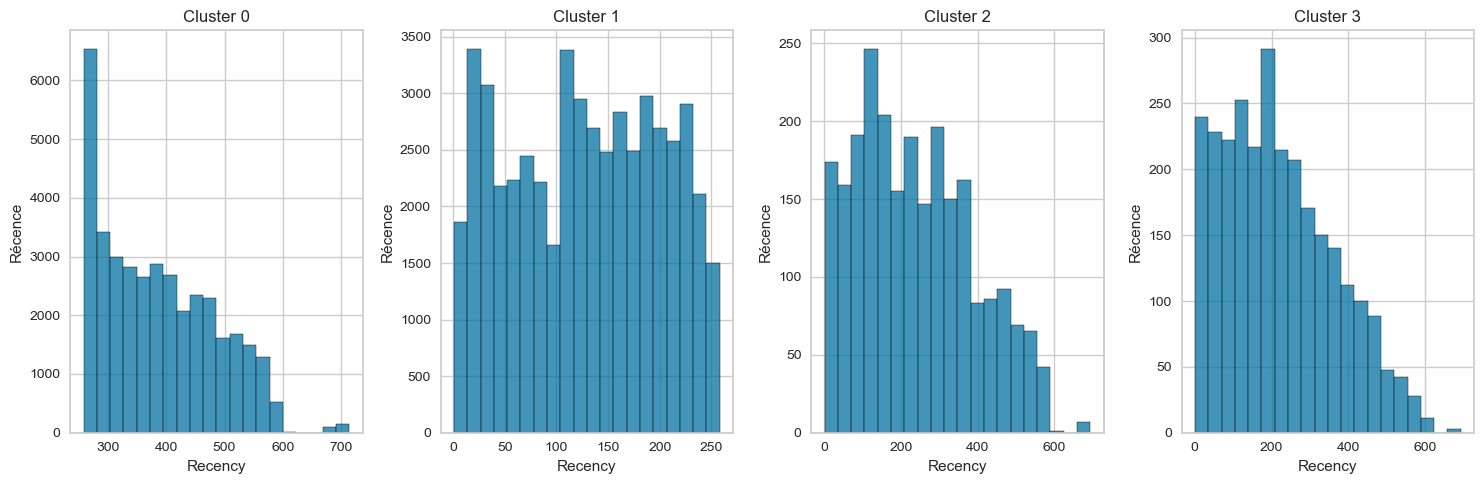

In [21]:

# Sélection de la caractéristique à visualiser
feature = 'Recency'
n_clusters = 4  # Nombre de clusters

# Création de la grille de sous-graphiques
fig, axes = plt.subplots(nrows=1, ncols=n_clusters, figsize=(15, 5))

# Parcours de chaque cluster
for j in range(n_clusters):
    # Filtrer le jeu de données pour le cluster spécifique
    cluster_data = ds_rfm_clusterized[ds_rfm_clusterized['Cluster'] == j]
    
    # Tracer l'histogramme pour la caractéristique et le cluster spécifiques
    sns.histplot(cluster_data[feature], bins=20, ax=axes[j])
    
    # Ajouter un titre pour chaque sous-graphique
    axes[j].set_title(f'Cluster {j}')
    axes[j].set_xlabel(feature)
    axes[j].set_ylabel('Récence')

# Ajuster l'espacement entre les sous-graphiques pour éviter les chevauchements
plt.tight_layout()

# Afficher les graphiques
plt.show()


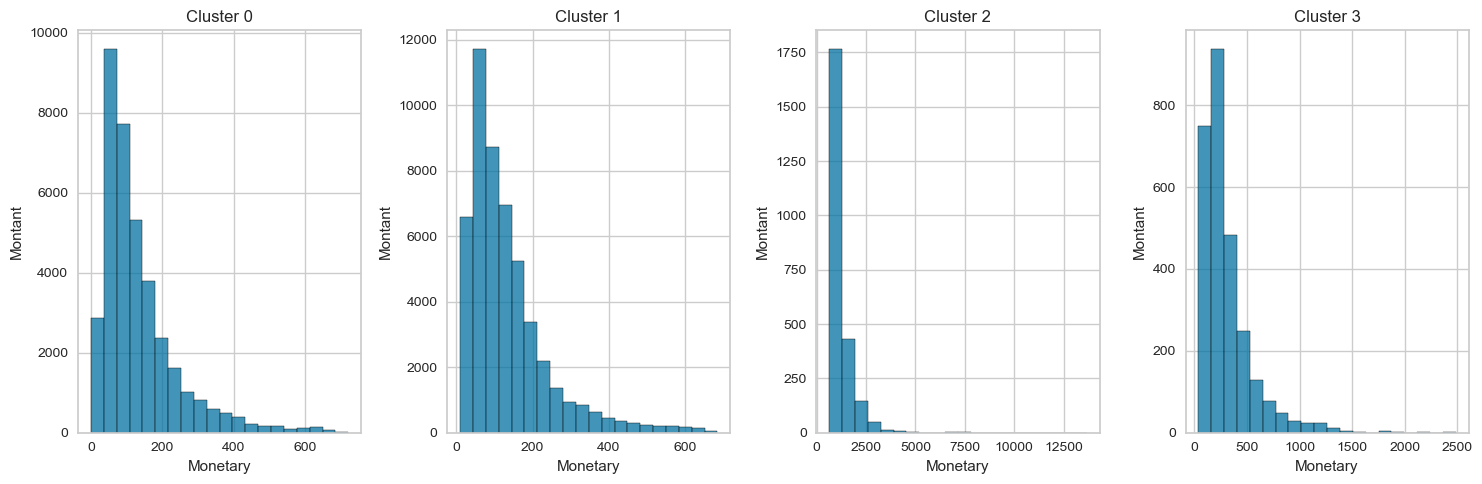

In [22]:

# Sélection de la caractéristique à visualiser
feature = 'Monetary'
n_clusters = 4  # Nombre de clusters

# Création de la grille de sous-graphiques
fig, axes = plt.subplots(nrows=1, ncols=n_clusters, figsize=(15, 5))

# Parcours de chaque cluster
for j in range(n_clusters):
    # Filtrer le jeu de données pour le cluster spécifique
    cluster_data = ds_rfm_clusterized[ds_rfm_clusterized['Cluster'] == j]
    
    # Tracer l'histogramme pour la caractéristique et le cluster spécifiques
    sns.histplot(cluster_data[feature], bins=20, ax=axes[j])
    
    # Ajouter un titre pour chaque sous-graphique
    axes[j].set_title(f'Cluster {j}')
    axes[j].set_xlabel(feature)
    axes[j].set_ylabel('Montant')

# Ajuster l'espacement entre les sous-graphiques pour éviter les chevauchements
plt.tight_layout()

# Afficher les graphiques
plt.show()

## 2ème essai : données RFM + DBSCAN

In [23]:
ds_rfm = ds_rfm.drop(columns='Cluster')

In [24]:
ds_rfm

,Recency,Frequency,Monetary
0,112,1,141.90
1,115,1,27.19
2,537,1,86.22
3,321,1,43.62
4,288,1,196.89
...,...,...,...
93353,447,1,2067.42
93354,262,1,84.58
93355,568,1,112.46
93356,119,1,133.69


## Création de quantiles pour échantillonage stratifié

In [25]:
#création de la fonction pour créer les classes de quantiles
def create_quantile_classes(df, column, n_quantiles=20):
    """
    Crée des classes de quantiles pour une colonne donnée dans un DataFrame.

    Parameters:
    df (pandas.DataFrame): Le DataFrame contenant les données.
    column (str): Le nom de la colonne à transformer en quantiles.
    n_quantiles (int): Le nombre de quantiles à créer (par défaut 20).

    Returns:
    pandas.DataFrame: Le DataFrame avec une nouvelle colonne indiquant les classes de quantiles.
    """
    quantiles = pd.qcut(df[column], q=n_quantiles, duplicates='drop')
    labels = range(1, quantiles.nunique() + 1)
    df[column + '_quantile'] = pd.qcut(df[column], q=n_quantiles, labels=labels, duplicates='drop')
    return df

# Application de la fonction pour les colonnes RFM
ds_rfm = create_quantile_classes(ds_rfm, 'Recency')
ds_rfm = create_quantile_classes(ds_rfm, 'Frequency')
ds_rfm = create_quantile_classes(ds_rfm, 'Monetary')

# Échantillonnage stratifié
echantillon_stratifie = ds_rfm.groupby(
    ['Recency_quantile', 'Frequency_quantile', 'Monetary_quantile']
).apply(lambda x: x.sample(frac=0.5)).reset_index(drop=True)

echantillon_stratifie






,Recency,Frequency,Monetary,Recency_quantile,Frequency_quantile,Monetary_quantile
0,21,1,29.43,1,1,1
1,21,1,28.47,1,1,1
2,8,1,31.22,1,1,1
3,19,1,32.43,1,1,1
4,6,1,22.36,1,1,1
...,...,...,...,...,...,...
46665,536,1,714.91,20,1,20
46666,693,1,534.98,20,1,20
46667,554,1,3602.47,20,1,20
46668,547,2,635.40,20,1,20


In [26]:
columns_to_drop = (['Recency_quantile', 'Frequency_quantile', 'Monetary_quantile'])

ds_rfm.drop(columns=columns_to_drop, inplace=True)

In [27]:
ds_rfm

,Recency,Frequency,Monetary
0,112,1,141.90
1,115,1,27.19
2,537,1,86.22
3,321,1,43.62
4,288,1,196.89
...,...,...,...
93353,447,1,2067.42
93354,262,1,84.58
93355,568,1,112.46
93356,119,1,133.69


In [28]:


echantillon_stratifie.drop(columns=columns_to_drop, inplace=True)

echantillon_stratifie

,Recency,Frequency,Monetary
0,21,1,29.43
1,21,1,28.47
2,8,1,31.22
3,19,1,32.43
4,6,1,22.36
...,...,...,...
46665,536,1,714.91
46666,693,1,534.98
46667,554,1,3602.47
46668,547,2,635.40


## Standardisation des données

In [29]:
# Séparation et Standardisation des données
X = echantillon_stratifie
std_scale = preprocessing.StandardScaler()
X_scaled=std_scale.fit_transform(X)


## Grid search

In [30]:


# Définir les valeurs d'epsilon à tester
epsilon_values = [0.1, 0.3, 0.5, 0.7, 0.9]

# Initialisation des variables pour stocker le meilleur epsilon et le meilleur silhouette score
best_epsilon = None
best_silhouette_score = -1 

# Iiterer sur les valeurs d'epsilon
for epsilon in epsilon_values:
    dbscan = DBSCAN(eps=epsilon, min_samples=10)
    labels = dbscan.fit_predict(X_scaled)
    silhouette = silhouette_score(X_scaled, labels)
    
    print(f"Epsilon: {epsilon}, Silhouette Score: {silhouette}")
    
    # mise à jour du meilleur epsilon et du meilleur silhouette score
    if silhouette > best_silhouette_score:
        best_epsilon = epsilon
        best_silhouette_score = silhouette

print(f"Best Epsilon: {best_epsilon}, Best Silhouette Score: {best_silhouette_score}")




Epsilon: 0.1, Silhouette Score: 0.21674308471164033
Epsilon: 0.3, Silhouette Score: 0.44744926136073726
Epsilon: 0.5, Silhouette Score: 0.4604908762192592
Epsilon: 0.7, Silhouette Score: 0.7084873297387663
Epsilon: 0.9, Silhouette Score: 0.7072512037522826
Best Epsilon: 0.7, Best Silhouette Score: 0.7084873297387663


In [31]:

# Définir les valeurs d'epsilon à tester
epsilon_values = [0.1, 0.3, 0.5, 0.7, 0.9]

# Initialisation des variables pour stocker le meilleur epsilon et le meilleur silhouette score
best_epsilon = None
best_silhouette_score = -1 

# Iiterer sur les valeurs d'epsilon
for epsilon in epsilon_values:
    dbscan = DBSCAN(eps=epsilon, min_samples=100)
    labels = dbscan.fit_predict(X_scaled)
    silhouette = silhouette_score(X_scaled, labels)
    
    print(f"Epsilon: {epsilon}, Silhouette Score: {silhouette}")
    
    # mise à jour du meilleur epsilon et du meilleur silhouette score
    if silhouette > best_silhouette_score:
        best_epsilon = epsilon
        best_silhouette_score = silhouette

print(f"Best Epsilon: {best_epsilon}, Best Silhouette Score: {best_silhouette_score}")

Epsilon: 0.1, Silhouette Score: 0.491315649553514
Epsilon: 0.3, Silhouette Score: 0.6781033678956404
Epsilon: 0.5, Silhouette Score: 0.4711319317007608
Epsilon: 0.7, Silhouette Score: 0.7083623843687539
Epsilon: 0.9, Silhouette Score: 0.7084690329493045
Best Epsilon: 0.9, Best Silhouette Score: 0.7084690329493045


In [32]:

# Définir les valeurs d'epsilon à tester
epsilon_values = [0.1, 0.3, 0.5, 0.7, 0.9]

# Initialisation des variables pour stocker le meilleur epsilon et le meilleur silhouette score
best_epsilon = None
best_silhouette_score = -1  

# Iiterer sur les valeurs d'epsilon
for epsilon in epsilon_values:
    dbscan = DBSCAN(eps=epsilon, min_samples=50)
    labels = dbscan.fit_predict(X_scaled)
    silhouette = silhouette_score(X_scaled, labels)
    
    print(f"Epsilon: {epsilon}, Silhouette Score: {silhouette}")
    
     # mise à jour du meilleur epsilon et du meilleur silhouette score
    if silhouette > best_silhouette_score:
        best_epsilon = epsilon
        best_silhouette_score = silhouette

print(f"Best Epsilon: {best_epsilon}, Best Silhouette Score: {best_silhouette_score}")

Epsilon: 0.1, Silhouette Score: -0.05541278214716598
Epsilon: 0.3, Silhouette Score: 0.41648157244465617
Epsilon: 0.5, Silhouette Score: 0.47164341405623567
Epsilon: 0.7, Silhouette Score: 0.7079291157692819
Epsilon: 0.9, Silhouette Score: 0.708012711637537
Best Epsilon: 0.9, Best Silhouette Score: 0.708012711637537


In [33]:
# Séparation et Standardisation des données
X = ds_rfm
std_scale = preprocessing.StandardScaler()
X_scaled=std_scale.fit_transform(X)

In [34]:
from sklearn.cluster import DBSCAN

# Utiliser les meilleurs paramètres trouvés pour DBSCAN
best_epsilon = 0.7
min_samples = 100

# Initialisation du modèle DBSCAN
dbscan = DBSCAN(eps=best_epsilon, min_samples=min_samples)

# Fit du modèle aux données
labels = dbscan.fit_predict(X_scaled)

print("Cluster Labels:", labels)


Cluster Labels: [0 0 0 ... 0 0 0]


## Affichage des métriques

## Scores silhouette

In [35]:
# Calcul du coefficient de silhouette pour les clusters attribués
silhouette_avg_dbscan_rfm = silhouette_score(X_scaled, labels)
print (silhouette_avg_dbscan_rfm )

0.711732906828015


In [36]:
ds_rfm['Cluster'] = labels

In [37]:
ds_rfm['Cluster'].unique()

array([ 0,  1, -1], dtype=int64)

## Boxplots

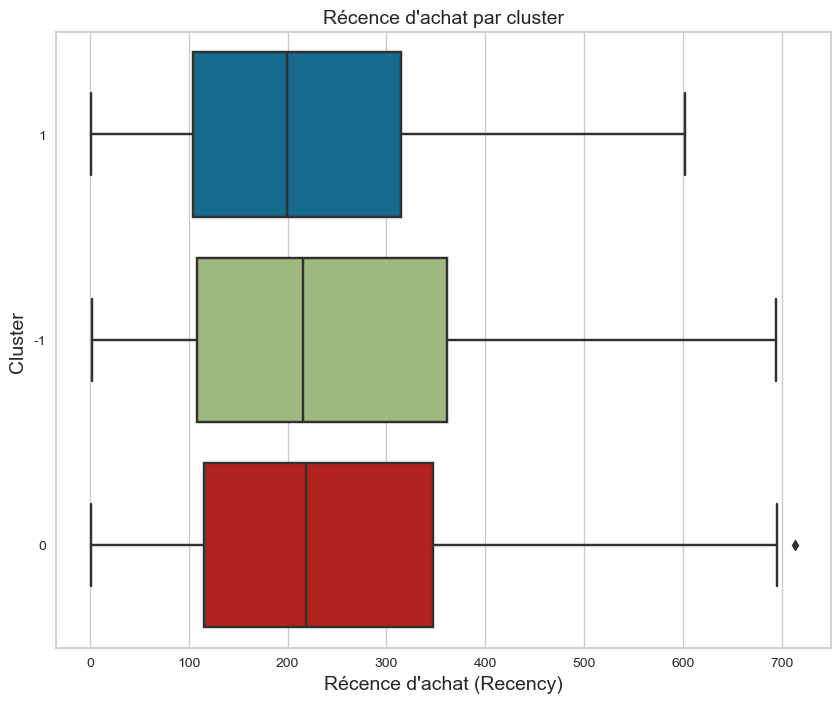

In [38]:
# Boxplot de la Récence par cluster
ordre_cluster = ds_rfm.groupby('Cluster')['Recency'].median().sort_values().index
plt.figure(figsize=(10,8))
plt.title("Récence d'achat par cluster", fontsize=14)
sns.boxplot(x=ds_rfm['Recency'], 
            y=ds_rfm['Cluster'], 
            showfliers=True,
            orient='h', 
            order=ordre_cluster,
            data=ds_rfm)
plt.xlabel("Récence d'achat (Recency)",fontsize=14)
plt.ylabel('Cluster ',fontsize=14)
plt.show()

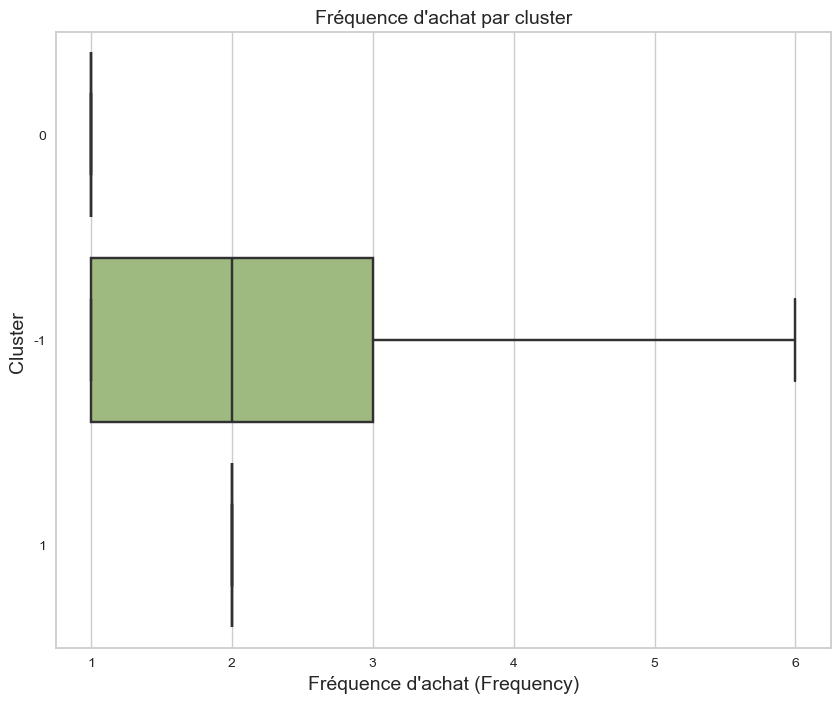

In [39]:
# Boxplot de la Fréquence par cluster
ordre_cluster = ds_rfm.groupby('Cluster')['Frequency'].median().sort_values().index
plt.figure(figsize=(10,8))
plt.title("Fréquence d'achat par cluster", fontsize=14)
sns.boxplot(x=ds_rfm['Frequency'], 
            y=ds_rfm['Cluster'], 
            showfliers=False,
            orient='h', 
            order=ordre_cluster,
            data=ds_rfm)
plt.xlabel("Fréquence d'achat (Frequency)",fontsize=14)
plt.ylabel('Cluster ',fontsize=14)
plt.show()

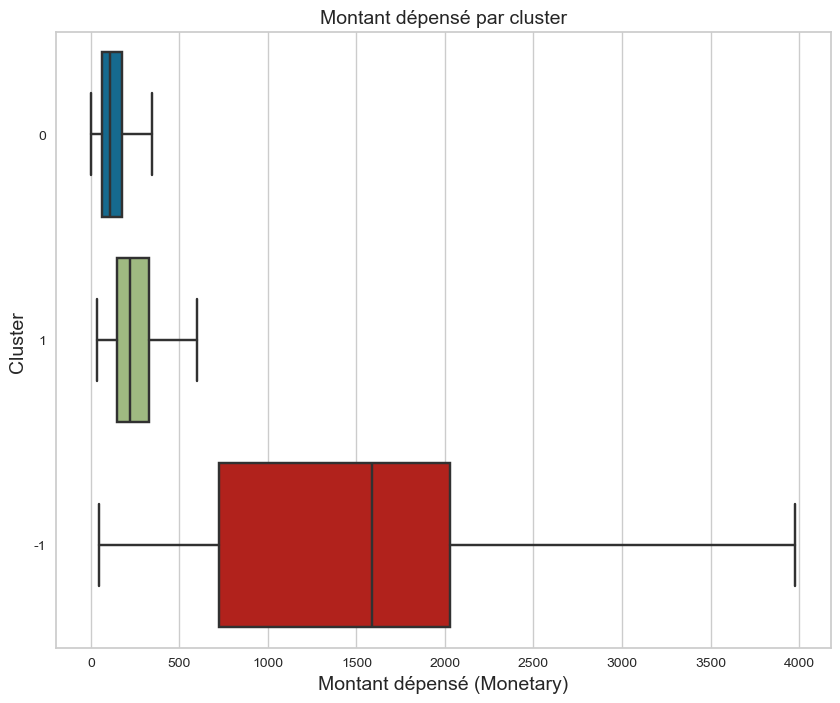

In [40]:
# Boxplot du Montant dépensé par cluster

ordre_cluster = ds_rfm.groupby('Cluster')['Monetary'].median().sort_values().index
plt.figure(figsize=(10,8))
plt.title("Montant dépensé par cluster", fontsize=14)
sns.boxplot(x=ds_rfm['Monetary'], 
            y=ds_rfm['Cluster'], 
            showfliers=False,
            orient='h', 
            order=ordre_cluster,
            data=ds_rfm)
plt.xlabel('Montant dépensé (Monetary)',fontsize=14)
plt.ylabel('Cluster ',fontsize=14)
plt.show()# Boxplot du Montant dépensé par cluster



## Comparaison des moyennes

In [41]:
# Regroupement des données par cluster et calcul des moyennes
cluster_means = ds_rfm.groupby('Cluster').mean()

# Affichage des moyennes de chaque caractéristique pour chaque cluster
print(cluster_means)

            Recency  Frequency     Monetary
Cluster                                    
-1       246.562897   1.908513  1503.702008
 0       238.388794   1.000000   151.957048
 1       218.361331   2.000000   252.632416


In [42]:
# Calculer les moyennes des variables RFM par cluster
clusters = ds_rfm['Cluster'].unique()

# Creation d'un dataframe vide pour stocker les moyennes
results_monetary = pd.DataFrame(columns=['Cluster1', 'Cluster2', 'Mean1', 'Mean2', 'T-score_monetary', 'p-value'])

for i in range(len(clusters)):
    for j in range(i+1, len(clusters)):
        
        cluster_data_i = ds_rfm[ds_rfm['Cluster'] == clusters[i]]['Monetary']
        cluster_data_j = ds_rfm[ds_rfm['Cluster'] == clusters[j]]['Monetary']
        
        #  t-test
        t_score, p_value = ttest_ind(cluster_data_i, cluster_data_j)
        
        # Calcul des moyennes
        mean_i = cluster_data_i.mean()
        mean_j = cluster_data_j.mean()
        
        # ajout des moyennes au dataframe
        results_monetary.loc[len(results_monetary)] = [clusters[i], clusters[j], mean_i.round(), mean_j.round(), t_score.round(), p_value.round(2)]


results_monetary


,Cluster1,Cluster2,Mean1,Mean2,T-score_monetary,p-value
0,0.0,1.0,152.0,253.0,-30.0,0.0
1,0.0,-1.0,152.0,1504.0,-197.0,0.0
2,1.0,-1.0,253.0,1504.0,-54.0,0.0


In [43]:
# Calculer les moyennes des variables RFM par cluster
clusters = ds_rfm['Cluster'].unique()

# Creation d'un dataframe vide pour stocker les moyennes
results_Frequency = pd.DataFrame(columns=['Cluster1', 'Cluster2', 'Mean1', 'Mean2', 'T-score_Frequency', 'p-value'])

for i in range(len(clusters)):
    for j in range(i+1, len(clusters)):
        
        cluster_data_i = ds_rfm[ds_rfm['Cluster'] == clusters[i]]['Frequency']
        cluster_data_j = ds_rfm[ds_rfm['Cluster'] == clusters[j]]['Frequency']
        
       #  t-test
        t_score, p_value = ttest_ind(cluster_data_i, cluster_data_j)
        
        # Calcul des moyennes
        mean_i = cluster_data_i.mean()
        mean_j = cluster_data_j.mean()
        
        # ajout des moyennes au dataframe
        results_Frequency.loc[len(results_Frequency)] = [clusters[i], clusters[j], mean_i.round(), mean_j.round(), t_score.round(), p_value.round(2)]


results_Frequency

,Cluster1,Cluster2,Mean1,Mean2,T-score_Frequency,p-value
0,0.0,1.0,1.0,2.0,-inf,0.0
1,0.0,-1.0,1.0,2.0,-228.0,0.0
2,1.0,-1.0,2.0,2.0,4.0,0.0


In [44]:
# Calculer les moyennes des variables RFM par cluster
clusters = ds_rfm['Cluster'].unique()

# Creation d'un dataframe vide pour stocker les moyennes
results_Recency = pd.DataFrame(columns=['Cluster1', 'Cluster2', 'Mean1', 'Mean2', 'T-score_Recency', 'p-value'])

for i in range(len(clusters)):
    for j in range(i+1, len(clusters)):
        
        cluster_data_i = ds_rfm[ds_rfm['Cluster'] == clusters[i]]['Recency']
        cluster_data_j = ds_rfm[ds_rfm['Cluster'] == clusters[j]]['Recency']
        
        #  t-test
        t_score, p_value = ttest_ind(cluster_data_i, cluster_data_j)
        
        # Calcul des moyennes
        mean_i = cluster_data_i.mean()
        mean_j = cluster_data_j.mean()
        
        # ajout des moyennes au dataframe
        results_Recency.loc[len(results_Recency)] = [clusters[i], clusters[j], mean_i.round(), mean_j.round(), t_score.round(), p_value.round(2)]


results_Recency

,Cluster1,Cluster2,Mean1,Mean2,T-score_Recency,p-value
0,0.0,1.0,238.0,218.0,6.0,0.00
1,0.0,-1.0,238.0,247.0,-1.0,0.14
2,1.0,-1.0,218.0,247.0,-5.0,0.00


Cluster -1 :

    Récence : Environ 247 jours depuis le dernier achat.
    Fréquence : En moyenne, chaque client a effectué environ 2 achats.
    Monétaire : La somme totale dépensée par les clients dans ce cluster est d'environ 1504 unités monétaires.
    Interprétation : Ce cluster représente des clients actifs et dépensiers.

Cluster 0 :

    Récence : Environ 238 jours depuis le dernier achat.
    Fréquence : En moyenne, chaque client a effectué un seul achat.
    Monétaire : La somme totale dépensée par les clients dans ce cluster est d'environ 152 unités monétaires.
    Interprétation : Ces clients sont récents ou occasionnels avec une faible dépense.

Cluster 1 :

    Récence : Environ 218 jours depuis le dernier achat.
    Fréquence : En moyenne, chaque client a effectué deux achats.
    Monétaire : La somme totale dépensée par les clients dans ce cluster est d'environ 253 unités monétaires.
    Interprétation : Ce cluster comprend des clients actifs et dépensiers.

## Histogrammes

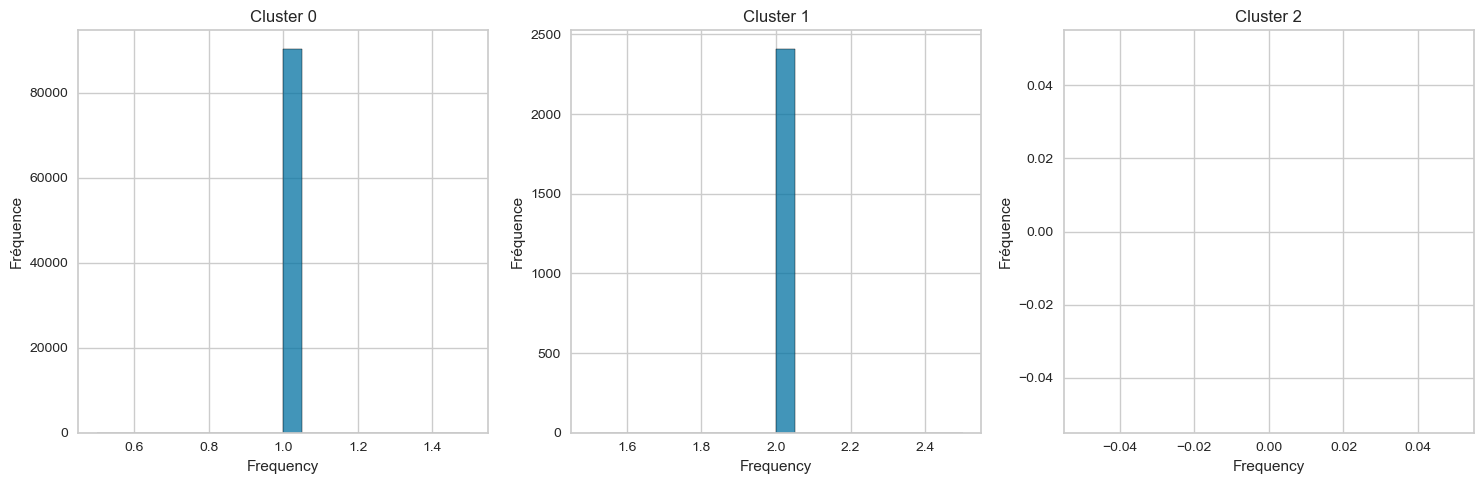

In [45]:


# Sélection de la caractéristique à visualiser
feature = 'Frequency'
n_clusters = 3  # Nombre de clusters

# Création de la grille de sous-graphiques
fig, axes = plt.subplots(nrows=1, ncols=n_clusters, figsize=(15, 5))

# Parcours de chaque cluster
for j in range(n_clusters):
    # Filtrer le jeu de données pour le cluster spécifique
    cluster_data = ds_rfm[ds_rfm['Cluster'] == j]
    
    # Tracer l'histogramme pour la caractéristique et le cluster spécifiques
    sns.histplot(cluster_data[feature], bins=20, ax=axes[j])
    
    # Ajouter un titre pour chaque sous-graphique
    axes[j].set_title(f'Cluster {j}')
    axes[j].set_xlabel(feature)
    axes[j].set_ylabel('Fréquence')

# Ajuster l'espacement entre les sous-graphiques pour éviter les chevauchements
plt.tight_layout()

# Afficher les graphiques
plt.show()

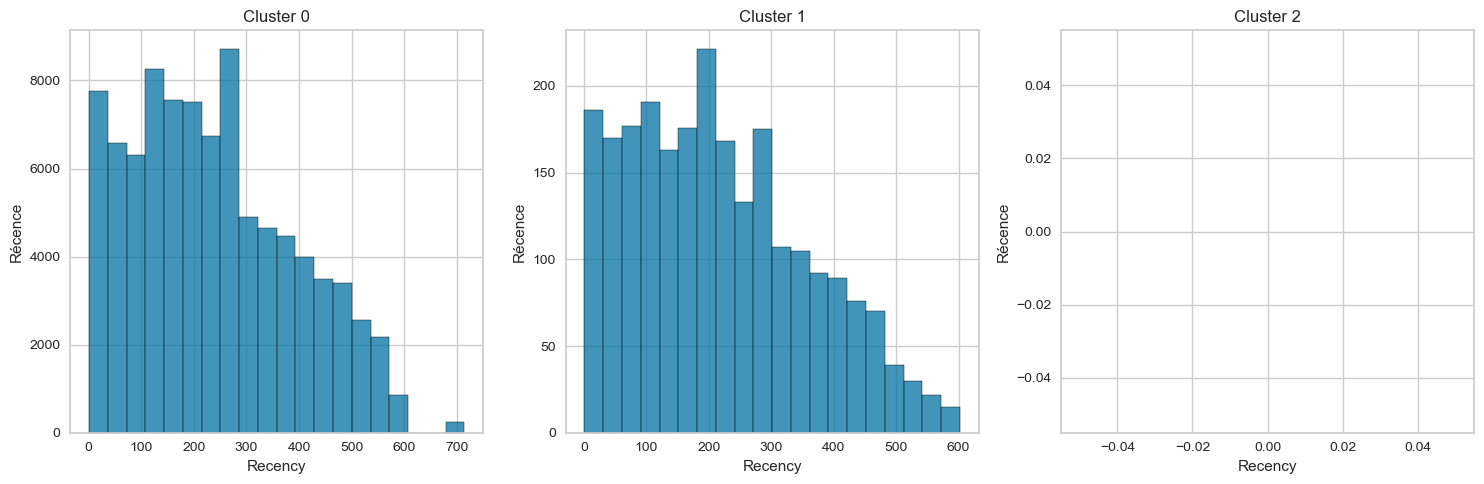

In [46]:

# Sélection de la caractéristique à visualiser
feature = 'Recency'
n_clusters = 3  # Nombre de clusters

# Création de la grille de sous-graphiques
fig, axes = plt.subplots(nrows=1, ncols=n_clusters, figsize=(15, 5))

# Parcours de chaque cluster
for j in range(n_clusters):
    # Filtrer le jeu de données pour le cluster spécifique
    cluster_data = ds_rfm[ds_rfm['Cluster'] == j]
    
    # Tracer l'histogramme pour la caractéristique et le cluster spécifiques
    sns.histplot(cluster_data[feature], bins=20, ax=axes[j])
    
    # Ajouter un titre pour chaque sous-graphique
    axes[j].set_title(f'Cluster {j}')
    axes[j].set_xlabel(feature)
    axes[j].set_ylabel('Récence')

# Ajuster l'espacement entre les sous-graphiques pour éviter les chevauchements
plt.tight_layout()

# Afficher les graphiques
plt.show()

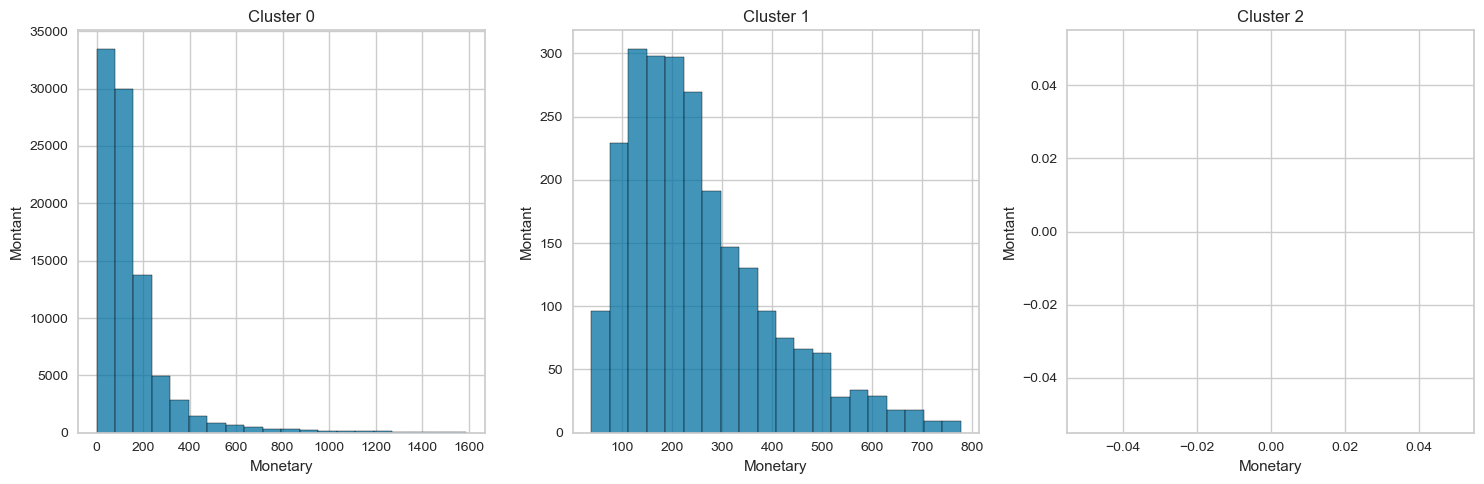

In [47]:


# Sélection de la caractéristique à visualiser
feature = 'Monetary'
n_clusters = 3  # Nombre de clusters

# Création de la grille de sous-graphiques
fig, axes = plt.subplots(nrows=1, ncols=n_clusters, figsize=(15, 5))

# Parcours de chaque cluster
for j in range(n_clusters):
    # Filtrer le jeu de données pour le cluster spécifique
    cluster_data = ds_rfm[ds_rfm['Cluster'] == j]
    
    # Tracer l'histogramme pour la caractéristique et le cluster spécifiques
    sns.histplot(cluster_data[feature], bins=20, ax=axes[j])
    
    # Ajouter un titre pour chaque sous-graphique
    axes[j].set_title(f'Cluster {j}')
    axes[j].set_xlabel(feature)
    axes[j].set_ylabel('Montant')


plt.tight_layout()
plt.show()

## 3ème essai : données RFM avec reviews + KMEANS

In [48]:
ds_rfmr = pd.read_csv('ds_rfm_w_review_w_state.csv')

In [49]:
ds_rfmr

,customer_unique_id,Recency,Frequency,Monetary,review,area_type_campagne,area_type_ville
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,5.0,True,False
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,4.0,True,False
2,0000f46a3911fa3c0805444483337064,537,1,86.22,3.0,True,False
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,4.0,True,False
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,5.0,True,False
...,...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,2067.42,5.0,True,False
93354,fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58,4.0,True,False
93355,ffff371b4d645b6ecea244b27531430a,568,1,112.46,5.0,True,False
93356,ffff5962728ec6157033ef9805bacc48,119,1,133.69,5.0,True,False


In [50]:
# Suppression des lignes avec des valeurs manquantes dans la colonne 'review'
ds_rfmr.dropna(subset=['review'], inplace=True)

In [51]:
ds_rfmr = ds_rfmr.drop(columns=['customer_unique_id','area_type_campagne','area_type_ville'])

In [52]:
ds_rfmr

,Recency,Frequency,Monetary,review
0,112,1,141.90,5.0
1,115,1,27.19,4.0
2,537,1,86.22,3.0
3,321,1,43.62,4.0
4,288,1,196.89,5.0
...,...,...,...,...
93353,447,1,2067.42,5.0
93354,262,1,84.58,4.0
93355,568,1,112.46,5.0
93356,119,1,133.69,5.0


## Standardisation des données

In [53]:

# Sélection des features  pour le clustering
X = ds_rfmr[['Recency', 'Frequency', 'Monetary','review']]

# Initialisation du scaler
scaler = StandardScaler()

# Normalisation 
X_standardized = scaler.fit_transform(X)

# Création d'un nouveau DataFrame
ds_rfmr_standardized = pd.DataFrame(X_standardized, columns=['Recency', 'Frequency', 'Monetary','review'])

## Méthode du coude

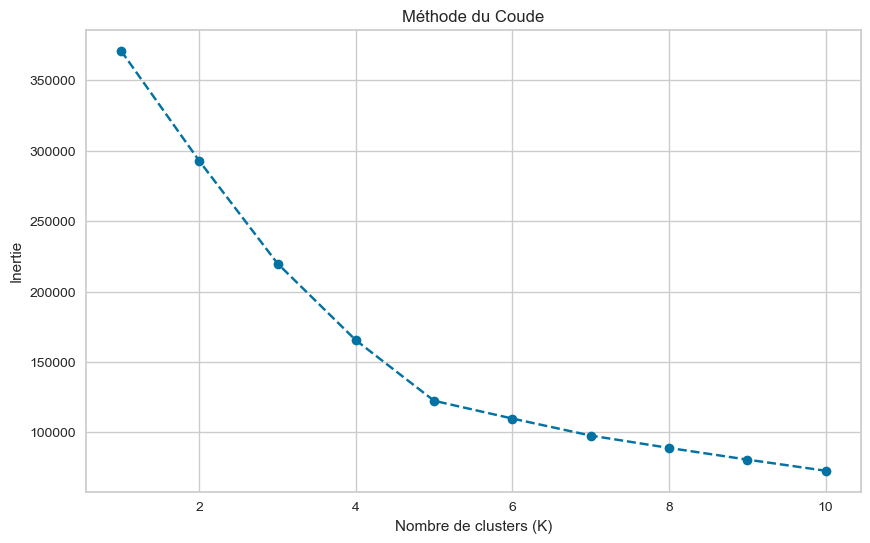

In [54]:


# Sélection des features pour le clustering
X = ds_rfmr_standardized[['Recency', 'Frequency', 'Monetary','review']]

# Calcul de l'inertie pour différentes valeurs de K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Tracé de la courbe du coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie')
plt.title('Méthode du Coude')
plt.grid(True)
plt.show()

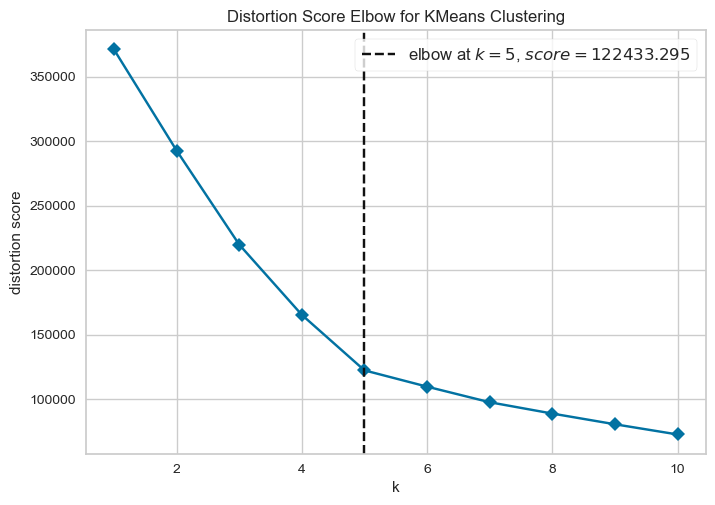

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
# Sélection des features pour le clustering
X = ds_rfmr_standardized[['Recency', 'Frequency', 'Monetary','review']]


# Initialisation du modèle KMeans
model = KMeans(random_state=42)

# Tracer la courbe du coude pour déterminer le nombre optimal de clusters (K)
visualizer = KElbowVisualizer(model, k=(1, 11), timings=False)
visualizer.fit(X)
visualizer.show()


In [56]:
#creation d'une copie du dataset poury appliquer le clustering
ds_rfmr_clusterized = ds_rfmr

## Clustering ( 5 clusters )

In [57]:
# Initialisation du  KMeans avec 5 clusters
kmeans_5 = KMeans(n_clusters=5, random_state=42)

# fit du modèle
kmeans_5.fit(ds_rfmr_standardized)

# Attribution des  clusters à chaque point de données dans rfm_rs
ds_rfmr_clusterized['Cluster'] = kmeans_5.labels_


ds_rfmr_clusterized

,Recency,Frequency,Monetary,review,Cluster
0,112,1,141.90,5.0,1
1,115,1,27.19,4.0,1
2,537,1,86.22,3.0,0
3,321,1,43.62,4.0,0
4,288,1,196.89,5.0,0
...,...,...,...,...,...
93353,447,1,2067.42,5.0,4
93354,262,1,84.58,4.0,0
93355,568,1,112.46,5.0,0
93356,119,1,133.69,5.0,1


## Affichage des métriques

## Score silhouette

In [58]:
# Calcul du coefficient de silhouette 
silhouette_avg_rfmr = silhouette_score(ds_rfmr_standardized, kmeans_5.labels_)

# Affichage du coefficient de silhouette moyen
print( silhouette_avg_rfmr)

0.4180182356840601


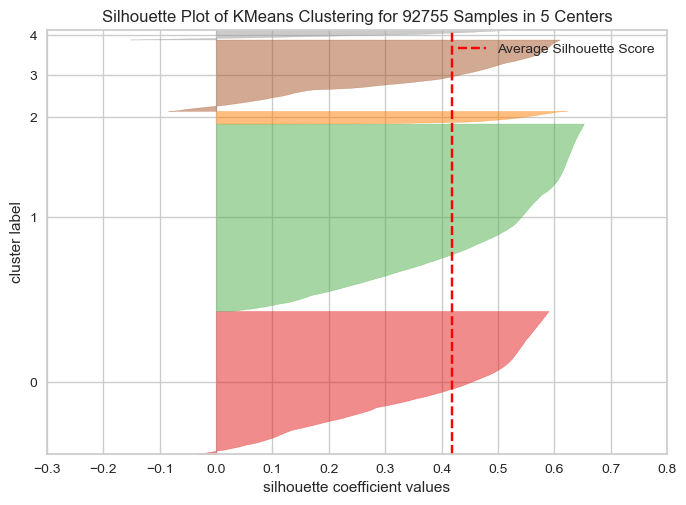

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 92755 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [59]:
visualizer = SilhouetteVisualizer(kmeans_5)
visualizer.fit(ds_rfmr_standardized)   
visualizer.poof()

## Boxplots

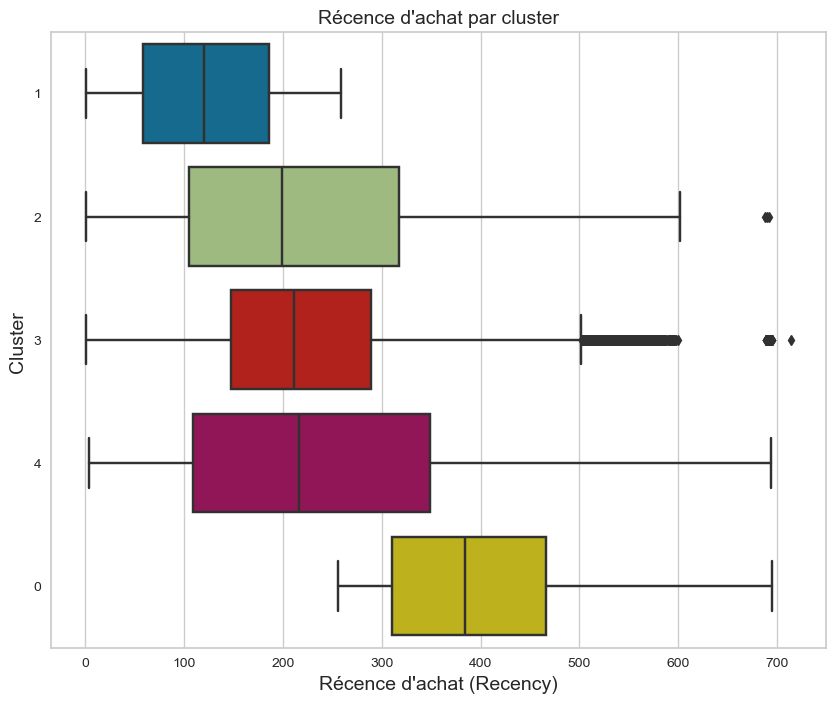

In [60]:
# Boxplot de la Récence par cluster
ordre_cluster = ds_rfmr_clusterized.groupby('Cluster')['Recency'].median().sort_values().index
plt.figure(figsize=(10,8))
plt.title("Récence d'achat par cluster", fontsize=14)
sns.boxplot(x=ds_rfmr_clusterized['Recency'], 
            y=ds_rfmr_clusterized['Cluster'], 
            showfliers=True,
            orient='h', 
            order=ordre_cluster,
            data=ds_rfmr_clusterized)
plt.xlabel("Récence d'achat (Recency)",fontsize=14)
plt.ylabel('Cluster ',fontsize=14)
plt.show()

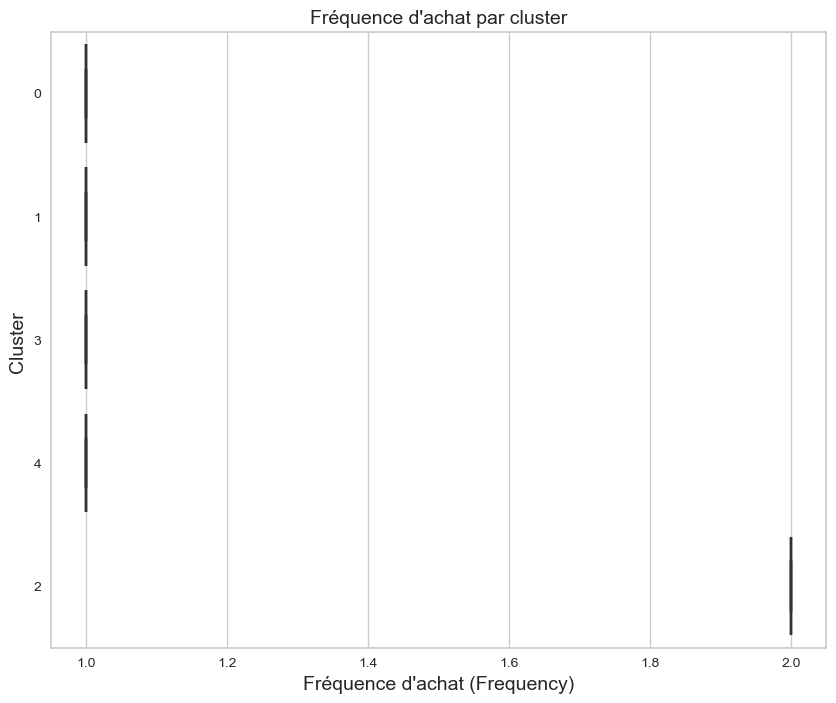

In [61]:
# Boxplot de la Fréquence par cluster
ordre_cluster = ds_rfmr_clusterized.groupby('Cluster')['Frequency'].median().sort_values().index
plt.figure(figsize=(10,8))
plt.title("Fréquence d'achat par cluster", fontsize=14)
sns.boxplot(x=ds_rfmr_clusterized['Frequency'], 
            y=ds_rfmr_clusterized['Cluster'], 
            showfliers=False,
            orient='h', 
            order=ordre_cluster,
            data=ds_rfmr_clusterized)
plt.xlabel("Fréquence d'achat (Frequency)",fontsize=14)
plt.ylabel('Cluster ',fontsize=14)
plt.show()

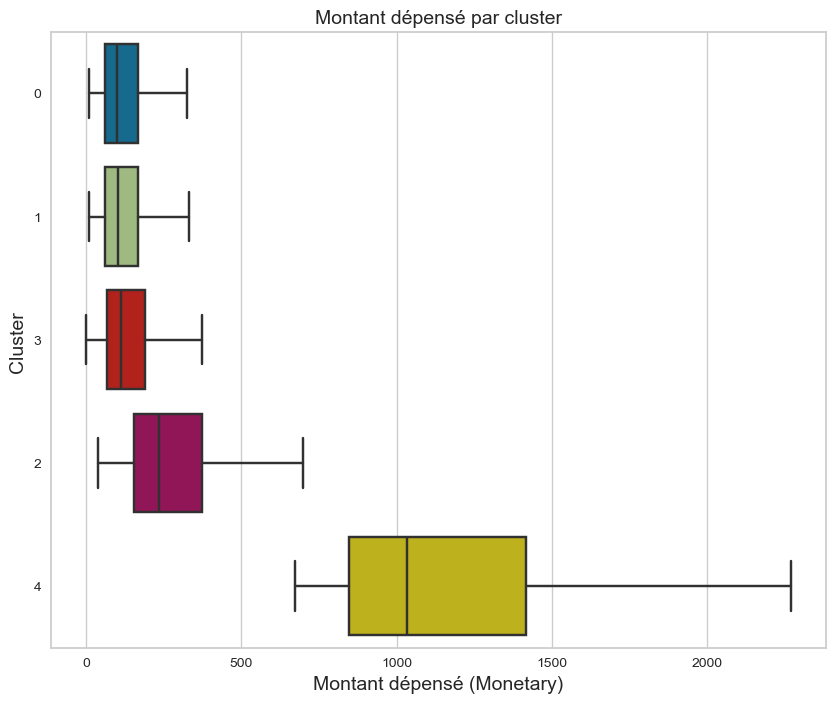

In [62]:
# Boxplot du Montant dépensé par cluster

ordre_cluster = ds_rfmr_clusterized.groupby('Cluster')['Monetary'].median().sort_values().index
plt.figure(figsize=(10,8))
plt.title("Montant dépensé par cluster", fontsize=14)
sns.boxplot(x=ds_rfmr_clusterized['Monetary'], 
            y=ds_rfmr_clusterized['Cluster'], 
            showfliers=False,
            orient='h', 
            order=ordre_cluster,
            data=ds_rfmr_clusterized)
plt.xlabel('Montant dépensé (Monetary)',fontsize=14)
plt.ylabel('Cluster ',fontsize=14)
plt.show()

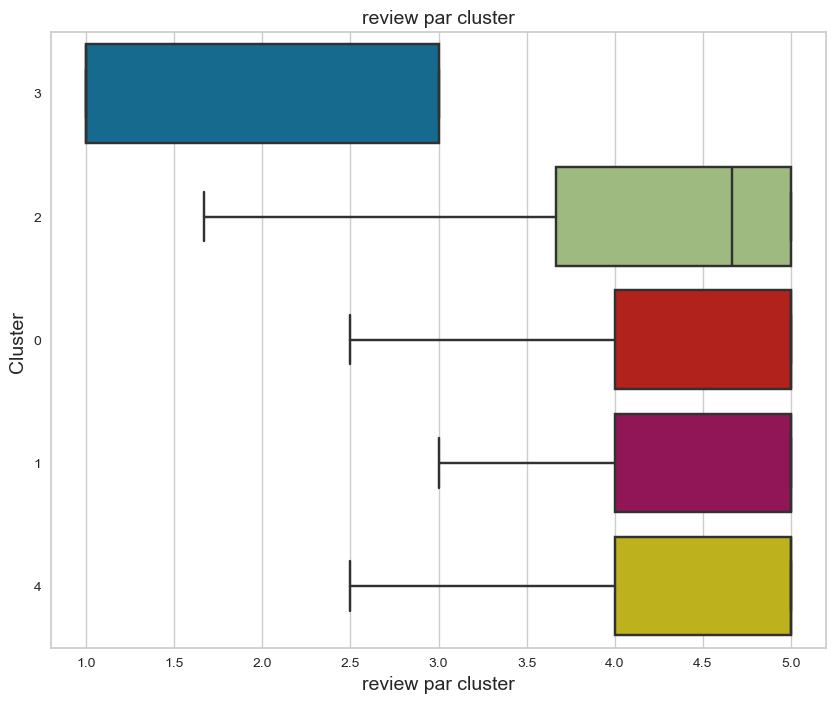

In [63]:
# Boxplot de la review  par cluster

ordre_cluster = ds_rfmr_clusterized.groupby('Cluster')['review'].median().sort_values().index
plt.figure(figsize=(10,8))
plt.title("review par cluster", fontsize=14)
sns.boxplot(x=ds_rfmr_clusterized['review'], 
            y=ds_rfmr_clusterized['Cluster'], 
            showfliers=False,
            orient='h', 
            order=ordre_cluster,
            data=ds_rfmr_clusterized)
plt.xlabel('review par cluster',fontsize=14)
plt.ylabel('Cluster ',fontsize=14)
plt.show()

## Comparaison des moyennes

In [64]:
clusters = ds_rfmr_clusterized['Cluster'].unique()

# creation d'un dataframe vide pour stocker les moyennes
results_monetary_rfmr = pd.DataFrame(columns=['Cluster1', 'Cluster2', 'Mean1', 'Mean2', 'T-score_monetary', 'p-value'])

for i in range(len(clusters)):
    for j in range(i+1, len(clusters)):
        # valeurs de la variable Monetary pour chaque cluster
        cluster_data_i = ds_rfmr_clusterized[ds_rfmr_clusterized['Cluster'] == clusters[i]]['Monetary']
        cluster_data_j = ds_rfmr_clusterized[ds_rfmr_clusterized['Cluster'] == clusters[j]]['Monetary']
        
        # test de student
        t_score, p_value = ttest_ind(cluster_data_i, cluster_data_j)
        
        # Calcul des moyennes
        mean_i = cluster_data_i.mean()
        mean_j = cluster_data_j.mean()
        
        #ajout des moyennes au dataframe
        results_monetary_rfmr.loc[len(results_monetary_rfmr)] = [clusters[i], clusters[j], mean_i.round(), mean_j.round(), t_score.round(), p_value.round(2)]


results_monetary_rfmr

,Cluster1,Cluster2,Mean1,Mean2,T-score_monetary,p-value
0,1.0,0.0,133.0,134.0,-1.0,0.15
1,1.0,3.0,133.0,151.0,-17.0,0.00
2,1.0,2.0,133.0,306.0,-73.0,0.00
3,1.0,4.0,133.0,1250.0,-267.0,0.00
4,0.0,3.0,134.0,151.0,-15.0,0.00
5,0.0,2.0,134.0,306.0,-68.0,0.00
6,0.0,4.0,134.0,1250.0,-240.0,0.00
7,3.0,2.0,151.0,306.0,-50.0,0.00
8,3.0,4.0,151.0,1250.0,-177.0,0.00
9,2.0,4.0,306.0,1250.0,-66.0,0.00


In [65]:
clusters = ds_rfmr_clusterized['Cluster'].unique()

# creation d'un dataframe vide pour stocker les moyennes
results_frequency_rfmr = pd.DataFrame(columns=['Cluster1', 'Cluster2', 'Mean1', 'Mean2', 'T-score_Frequency', 'p-value'])

for i in range(len(clusters)):
    for j in range(i+1, len(clusters)):
       # valeurs de la variable Frequence pour chaque cluster
        cluster_data_i = ds_rfmr_clusterized[ds_rfmr_clusterized['Cluster'] == clusters[i]]['Frequency']
        cluster_data_j = ds_rfmr_clusterized[ds_rfmr_clusterized['Cluster'] == clusters[j]]['Frequency']
        
        # test de student
        t_score, p_value = ttest_ind(cluster_data_i, cluster_data_j)
        
        # Calcul des moyennes
        mean_i = cluster_data_i.mean()
        mean_j = cluster_data_j.mean()
        
        #ajout des moyennes au dataframe
        results_frequency_rfmr.loc[len(results_frequency_rfmr)] = [clusters[i], clusters[j], mean_i.round(), mean_j.round(), t_score.round(), p_value.round(2)]


results_frequency_rfmr

,Cluster1,Cluster2,Mean1,Mean2,T-score_Frequency,p-value
0,1.0,0.0,1.0,1.0,NaN,NaN
1,1.0,3.0,1.0,1.0,NaN,NaN
2,1.0,2.0,1.0,2.0,-446.0,0.0
3,1.0,4.0,1.0,1.0,-26.0,0.0
4,0.0,3.0,1.0,1.0,NaN,NaN
5,0.0,2.0,1.0,2.0,-389.0,0.0
6,0.0,4.0,1.0,1.0,-23.0,0.0
7,3.0,2.0,1.0,2.0,-275.0,0.0
8,3.0,4.0,1.0,1.0,-16.0,0.0
9,2.0,4.0,2.0,1.0,94.0,0.0


In [66]:
clusters = ds_rfmr_clusterized['Cluster'].unique()

# creation d'un dataframe vide pour stocker les moyennes
results_Recency_rfmr = pd.DataFrame(columns=['Cluster1', 'Cluster2', 'Mean1', 'Mean2', 'T-score_Recency', 'p-value'])

for i in range(len(clusters)):
    for j in range(i+1, len(clusters)):
        # valeurs de la variable recence pour chaque cluster
        cluster_data_i = ds_rfmr_clusterized[ds_rfmr_clusterized['Cluster'] == clusters[i]]['Recency']
        cluster_data_j = ds_rfmr_clusterized[ds_rfmr_clusterized['Cluster'] == clusters[j]]['Recency']
        
        # test de student
        t_score, p_value = ttest_ind(cluster_data_i, cluster_data_j)
        
        # Calcul des moyennes
        mean_i = cluster_data_i.mean()
        mean_j = cluster_data_j.mean()
        
        #   ajout des moyennes au dataframe
        results_Recency_rfmr.loc[len(results_Recency_rfmr)] = [clusters[i], clusters[j], mean_i.round(), mean_j.round(), t_score.round(), p_value.round(2)]


results_Recency_rfmr

,Cluster1,Cluster2,Mean1,Mean2,T-score_Recency,p-value
0,1.0,0.0,123.0,394.0,-432.0,0.00
1,1.0,3.0,123.0,231.0,-126.0,0.00
2,1.0,2.0,123.0,220.0,-62.0,0.00
3,1.0,4.0,123.0,235.0,-63.0,0.00
4,0.0,3.0,394.0,231.0,156.0,0.00
5,0.0,2.0,394.0,220.0,87.0,0.00
6,0.0,4.0,394.0,235.0,69.0,0.00
7,3.0,2.0,231.0,220.0,4.0,0.00
8,3.0,4.0,231.0,235.0,-2.0,0.13
9,2.0,4.0,220.0,235.0,-4.0,0.00


## Visualisations des clusters

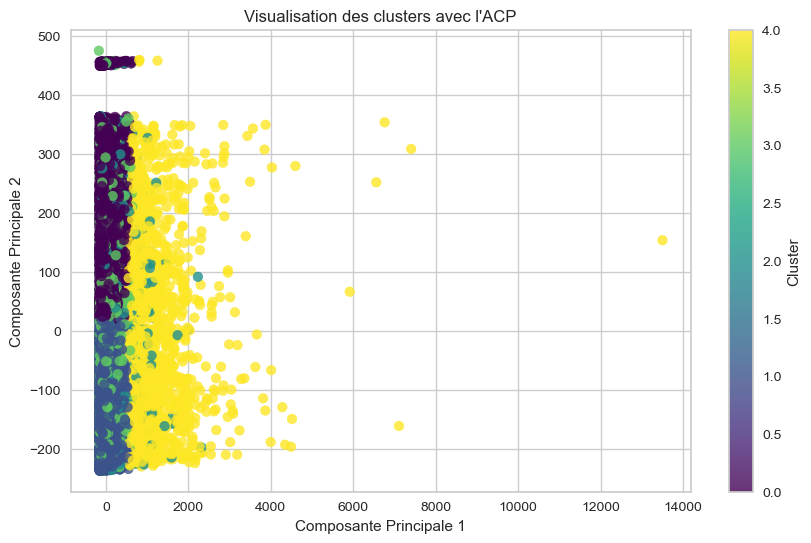

In [67]:

# Réduction de dimensionnalité avec l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(ds_rfmr_clusterized)

# Création du graphique de dispersion avec les clusters colorés
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_5.labels_, cmap='viridis', alpha=0.8)
plt.title('Visualisation des clusters avec l\'ACP')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.colorbar(label='Cluster')
plt.show()

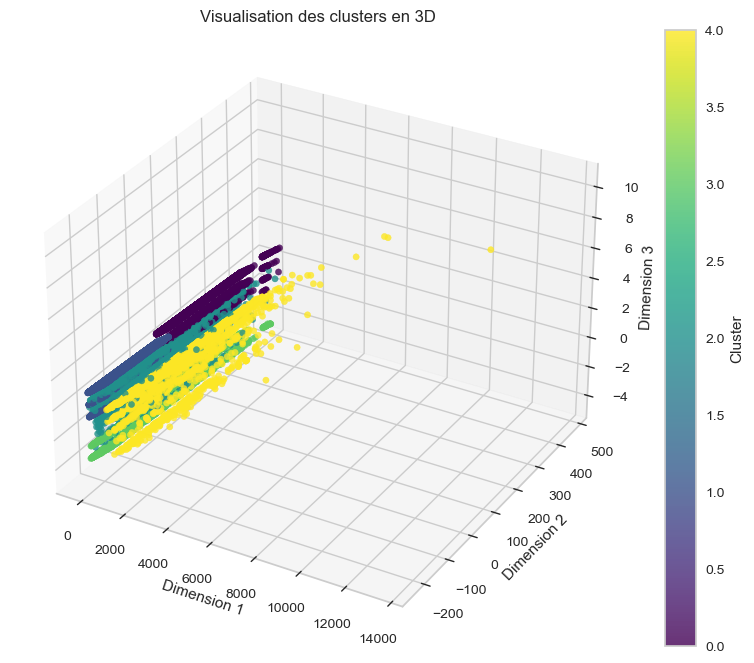

In [68]:

# Réduction de dimensionnalité avec PCA pour une visualisation en 3D
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(ds_rfmr_clusterized)

# Création du graphique en 3D avec les clusters colorés
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=kmeans_5.labels_, cmap='viridis', alpha=0.8)
plt.title('Visualisation des clusters en 3D')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.colorbar(scatter, label='Cluster')
plt.show()

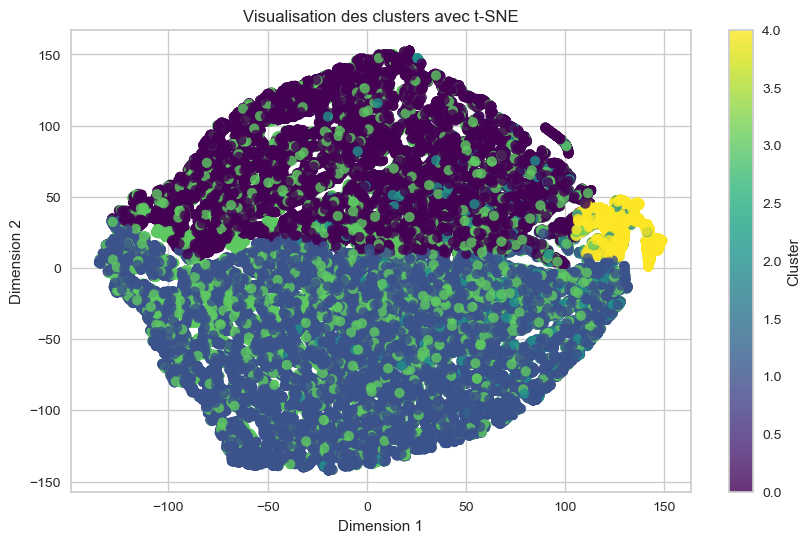

In [69]:

# Réduction de dimensionnalité avec t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(ds_rfmr_clusterized)

# Création du graphique de dispersion avec les clusters colorés
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_5.labels_, cmap='viridis', alpha=0.8)
plt.title('Visualisation des clusters avec t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster')
plt.show()

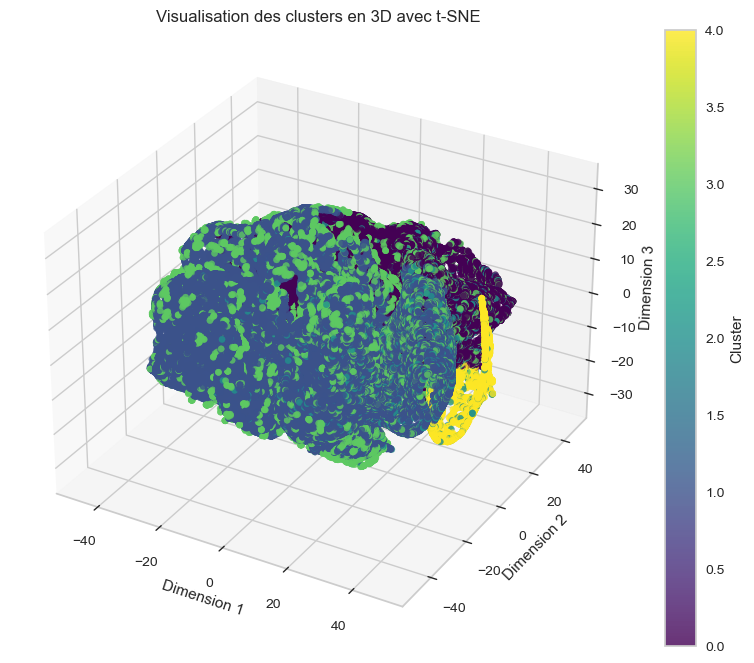

In [70]:

# Réduction de dimensionnalité avec t-SNE
tsne = TSNE(n_components=3, random_state=42)
X_tsne_3d = tsne.fit_transform(ds_rfmr_clusterized)

# Création du graphique en 3D avec les clusters colorés
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], c=kmeans_5.labels_, cmap='viridis', alpha=0.8)
plt.title('Visualisation des clusters en 3D avec t-SNE')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [71]:
# Regroupement des données par cluster et calcul des moyennes
cluster_means_rfmr = ds_rfmr_clusterized.groupby('Cluster').mean().round()

cluster_means_rfmr.reset_index(inplace=True)

# Affichage des moyennes de chaque caractéristique pour chaque cluster
cluster_means_rfmr

,Cluster,Recency,Frequency,Monetary,review
0,0,394.0,1.0,134.0,5.0
1,1,123.0,1.0,133.0,5.0
2,2,220.0,2.0,306.0,4.0
3,3,231.0,1.0,151.0,2.0
4,4,235.0,1.0,1250.0,4.0


Cluster 0 :

    Récence : Environ 394 jours depuis le dernier achat.
    Fréquence : En moyenne, chaque client a effectué un seul achat.
    Monétaire : La somme totale dépensée par les clients dans ce cluster est d'environ 134 reals.
    Score de revue : Les clients ont laissé un score de revue parfait de 5.
    Interprétation : "Récents ou occasionnels avec une faible dépense, mais très satisfaits"

Cluster 1 :

    Récence : Environ 123 jours depuis le dernier achat.
    Fréquence : En moyenne, chaque client a effectué un seul achat.
    Monétaire : La somme totale dépensée par les clients dans ce cluster est d'environ 133 reals.
    Score de revue : Les clients ont laissé un score de revue parfait de 5.
    Interprétation : "Récents avec une faible dépense, mais très satisfaits"

Cluster 2 :

    Récence : Environ 220 jours depuis le dernier achat.
    Fréquence : En moyenne, chaque client a effectué deux achats.
    Monétaire : La somme totale dépensée par les clients dans ce cluster est d'environ 306 reals.
    Score de revue : Les clients ont laissé un score de revue de 4.
    Interprétation : "Actifs et dépensiers, globalement satisfaits"

Cluster 3 :

    Récence : Environ 231 jours depuis le dernier achat.
    Fréquence : En moyenne, chaque client a effectué un seul achat.
    Monétaire : La somme totale dépensée par les clients dans ce cluster est d'environ 151 reals.
    Score de revue : Les clients ont laissé un score de revue de 2.
    Interprétation : "Inactifs ou occasionnels avec une dépense modérée, mais insatisfaits"

Cluster 4 :

    Récence : Environ 235 jours depuis le dernier achat.
    Fréquence : En moyenne, chaque client a effectué un seul achat.
    Monétaire : La somme totale dépensée par les clients dans ce cluster est d'environ 1250 reals.
    Score de revue : Les clients ont laissé un score de revue de 4.
    Interprétation : "Inactifs ou occasionnels, mais avec une dépense significative et globalement satisfaits"

## Histogrammes

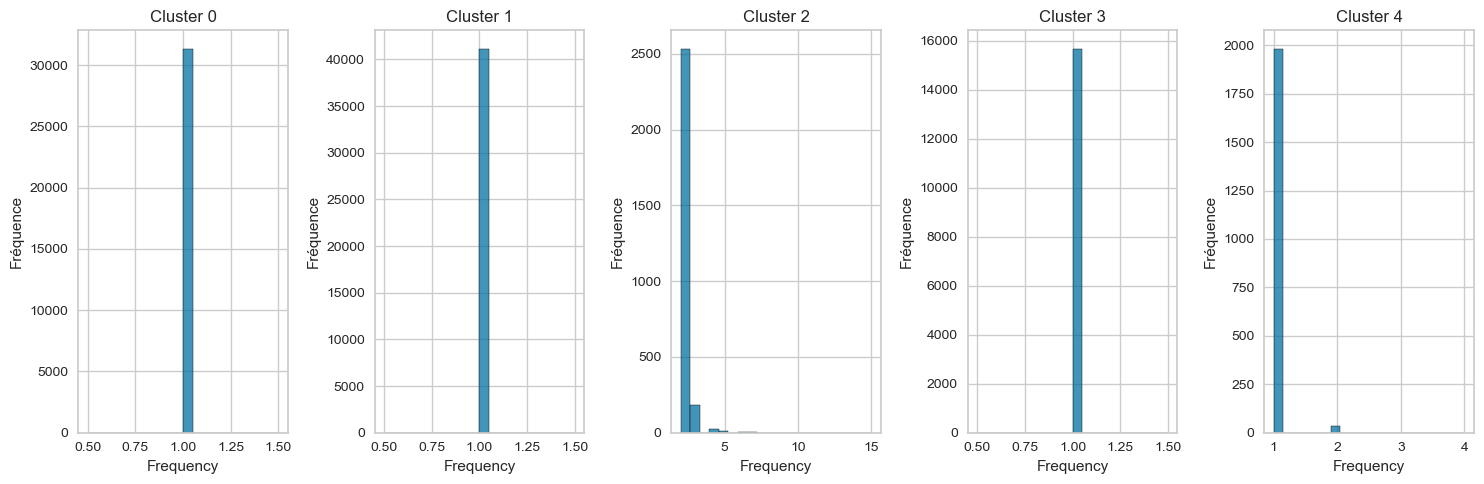

In [72]:
# Sélection de la caractéristique à visualiser
feature = 'Frequency'
n_clusters = 5  # Nombre de clusters

# Création de la grille de sous-graphiques
fig, axes = plt.subplots(nrows=1, ncols=n_clusters, figsize=(15, 5))

# Parcours de chaque cluster
for j in range(n_clusters):
    # Filtrer le jeu de données pour le cluster spécifique
    cluster_data = ds_rfmr_clusterized[ds_rfmr_clusterized['Cluster'] == j]
    
    # Tracer l'histogramme pour la caractéristique et le cluster spécifiques
    sns.histplot(cluster_data[feature], bins=20, ax=axes[j])
    
    # Ajouter un titre pour chaque sous-graphique
    axes[j].set_title(f'Cluster {j}')
    axes[j].set_xlabel(feature)
    axes[j].set_ylabel('Fréquence')

# Ajuster l'espacement entre les sous-graphiques pour éviter les chevauchements
plt.tight_layout()

# Afficher les graphiques
plt.show()


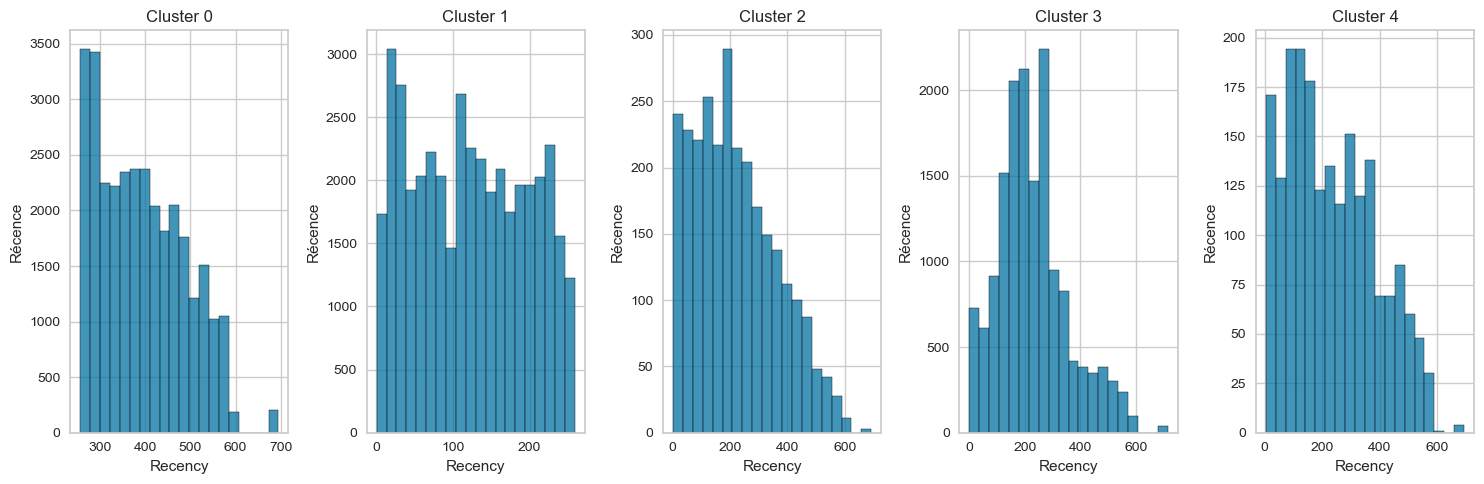

In [73]:
# Sélection de la caractéristique à visualiser
feature = 'Recency'
n_clusters = 5  # Nombre de clusters

# Création de la grille de sous-graphiques
fig, axes = plt.subplots(nrows=1, ncols=n_clusters, figsize=(15, 5))

# Parcours de chaque cluster
for j in range(n_clusters):
    # Filtrer le jeu de données pour le cluster spécifique
    cluster_data = ds_rfmr_clusterized[ds_rfmr_clusterized['Cluster'] == j]
    
    # Tracer l'histogramme pour la caractéristique et le cluster spécifiques
    sns.histplot(cluster_data[feature], bins=20, ax=axes[j])
    
    # Ajouter un titre pour chaque sous-graphique
    axes[j].set_title(f'Cluster {j}')
    axes[j].set_xlabel(feature)
    axes[j].set_ylabel('Récence')

# Ajuster l'espacement entre les sous-graphiques pour éviter les chevauchements
plt.tight_layout()

# Afficher les graphiques
plt.show()

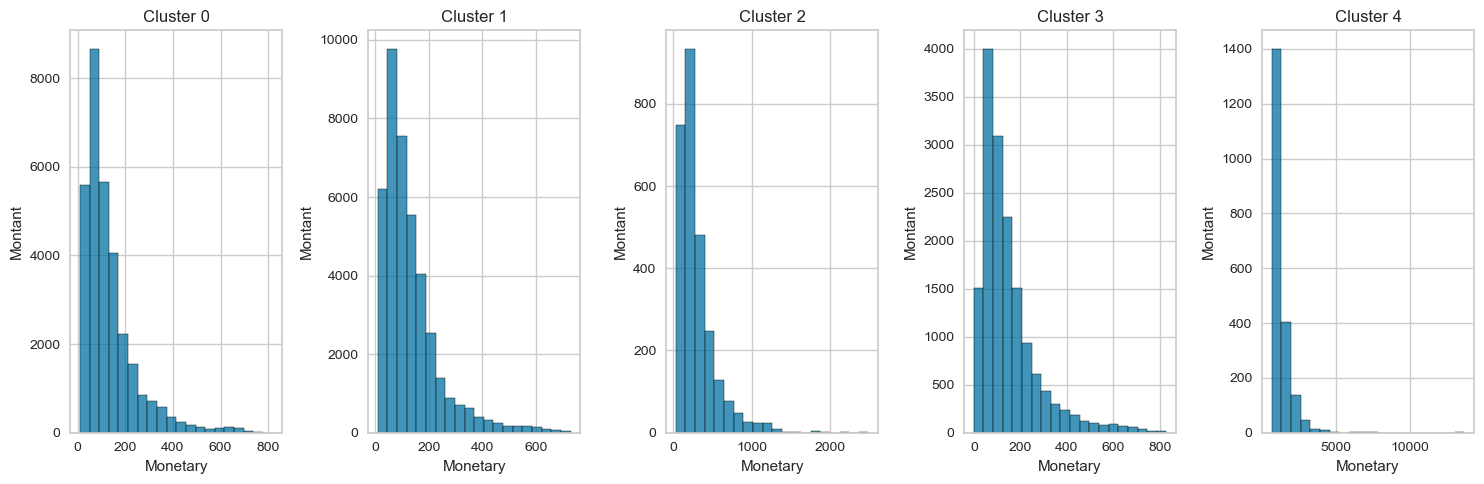

In [74]:
# Sélection de la caractéristique à visualiser
feature = 'Monetary'
n_clusters = 5  # Nombre de clusters

# Création de la grille de sous-graphiques
fig, axes = plt.subplots(nrows=1, ncols=n_clusters, figsize=(15, 5))

# Parcours de chaque cluster
for j in range(n_clusters):
    # Filtrer le jeu de données pour le cluster spécifique
    cluster_data = ds_rfmr_clusterized[ds_rfmr_clusterized['Cluster'] == j]
    
    # Tracer l'histogramme pour la caractéristique et le cluster spécifiques
    sns.histplot(cluster_data[feature], bins=20, ax=axes[j])
    
    # Ajouter un titre pour chaque sous-graphique
    axes[j].set_title(f'Cluster {j}')
    axes[j].set_xlabel(feature)
    axes[j].set_ylabel('Montant')

# Ajuster l'espacement entre les sous-graphiques pour éviter les chevauchements
plt.tight_layout()

# Afficher les graphiques
plt.show()

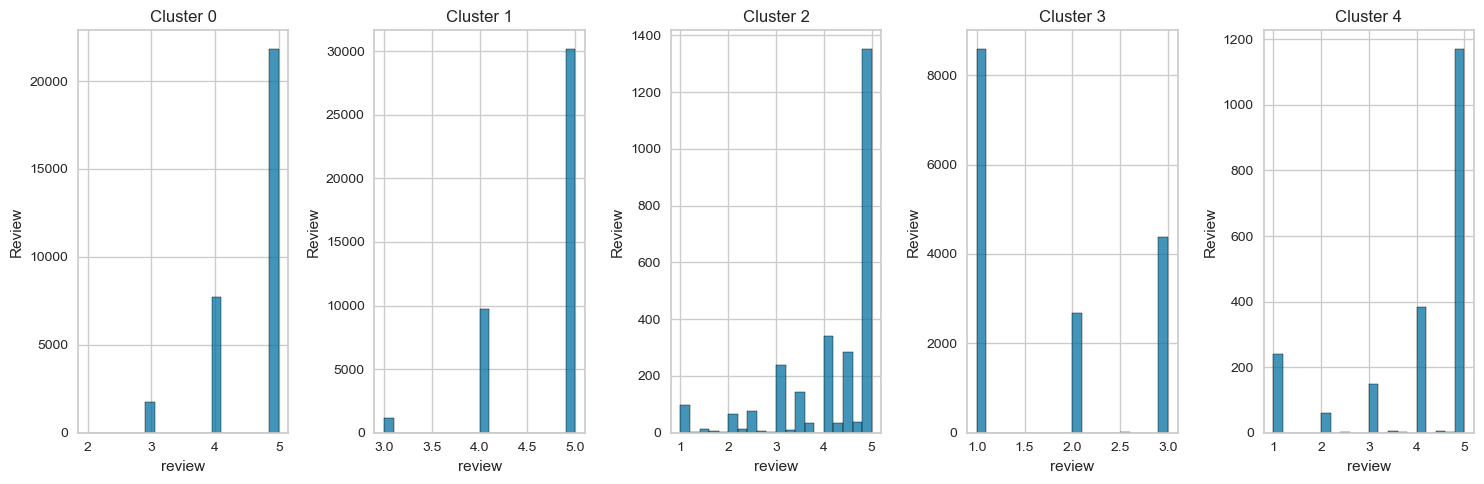

In [75]:
# Sélection de la caractéristique à visualiser
feature = 'review'
n_clusters = 5  # Nombre de clusters

# Création de la grille de sous-graphiques
fig, axes = plt.subplots(nrows=1, ncols=n_clusters, figsize=(15, 5))

# Parcours de chaque cluster
for j in range(n_clusters):
    # Filtrer le jeu de données pour le cluster spécifique
    cluster_data = ds_rfmr_clusterized[ds_rfmr_clusterized['Cluster'] == j]
    
    # Tracer l'histogramme pour la caractéristique et le cluster spécifiques
    sns.histplot(cluster_data[feature], bins=20, ax=axes[j])
    
    # Ajouter un titre pour chaque sous-graphique
    axes[j].set_title(f'Cluster {j}')
    axes[j].set_xlabel(feature)
    axes[j].set_ylabel('Review')

# Ajuster l'espacement entre les sous-graphiques pour éviter les chevauchements
plt.tight_layout()

# Afficher les graphiques
plt.show()

## 3ème essai : données RFM + review + DBSCAN

In [76]:
ds_rfmr = ds_rfmr.drop(columns='Cluster')

In [77]:
ds_rfmr

,Recency,Frequency,Monetary,review
0,112,1,141.90,5.0
1,115,1,27.19,4.0
2,537,1,86.22,3.0
3,321,1,43.62,4.0
4,288,1,196.89,5.0
...,...,...,...,...
93353,447,1,2067.42,5.0
93354,262,1,84.58,4.0
93355,568,1,112.46,5.0
93356,119,1,133.69,5.0


## Création de quantiles pour échantillonage stratifié

In [78]:

def create_quantile_classes(df, column, n_quantiles=20):
    """
    Crée des classes de quantiles pour une colonne donnée dans un DataFrame.

    Parameters:
    df (pandas.DataFrame): Le DataFrame contenant les données.
    column (str): Le nom de la colonne à transformer en quantiles.
    n_quantiles (int): Le nombre de quantiles à créer (par défaut 20).

    Returns:
    pandas.DataFrame: Le DataFrame avec une nouvelle colonne indiquant les classes de quantiles.
    """
    quantiles = pd.qcut(df[column], q=n_quantiles, duplicates='drop')
    labels = range(1, quantiles.nunique() + 1)
    df[column + '_quantile'] = pd.qcut(df[column], q=n_quantiles, labels=labels, duplicates='drop')
    return df

# Application de la fonction pour les colonnes RFM et review
ds_rfmr = create_quantile_classes(ds_rfmr, 'Recency')
ds_rfmr = create_quantile_classes(ds_rfmr, 'Frequency')
ds_rfmr = create_quantile_classes(ds_rfmr, 'Monetary')
ds_rfmr = create_quantile_classes(ds_rfmr, 'review')

# Échantillonnage stratifié
echantillon_stratifie = ds_rfmr.groupby(
    ['Recency_quantile', 'Frequency_quantile', 'Monetary_quantile', 'review_quantile']
).apply(lambda x: x.sample(frac=0.5)).reset_index(drop=True)

echantillon_stratifie



,Recency,Frequency,Monetary,review,Recency_quantile,Frequency_quantile,Monetary_quantile,review_quantile
0,5,1,26.29,1.0,1,1,1,1
1,23,1,32.43,1.0,1,1,1,1
2,21,1,19.06,1.0,1,1,1,1
3,23,1,23.84,1.0,1,1,1,1
4,23,1,30.82,2.0,1,1,1,1
...,...,...,...,...,...,...,...,...
46365,544,1,816.17,5.0,20,1,20,4
46366,580,1,1837.16,5.0,20,1,20,4
46367,523,1,602.11,5.0,20,1,20,4
46368,533,1,577.94,5.0,20,1,20,4


In [79]:
columns_to_drop = (['Recency_quantile', 'Frequency_quantile', 'Monetary_quantile', 'review_quantile'])

ds_rfmr.drop(columns=columns_to_drop, inplace=True)

In [80]:
echantillon_stratifie.drop(columns=columns_to_drop, inplace=True)

echantillon_stratifie

,Recency,Frequency,Monetary,review
0,5,1,26.29,1.0
1,23,1,32.43,1.0
2,21,1,19.06,1.0
3,23,1,23.84,1.0
4,23,1,30.82,2.0
...,...,...,...,...
46365,544,1,816.17,5.0
46366,580,1,1837.16,5.0
46367,523,1,602.11,5.0
46368,533,1,577.94,5.0


## Standardisation des données

In [81]:
# Séparation et Standardisation des données
X = echantillon_stratifie
std_scale = preprocessing.StandardScaler()
X_scaled=std_scale.fit_transform(X)

## Grid search

In [82]:


# Definition des valeurs d'epsilon à tester
epsilon_values = [0.1, 0.3, 0.5, 0.7, 0.9]

# Initialisation des variables pour stocker les résultats
best_epsilon = None
best_silhouette_score = -1  

# Iteration sur les valeurs d'epsilon et calcul du score de silhouette
for epsilon in epsilon_values:
    dbscan = DBSCAN(eps=epsilon, min_samples=10)
    labels = dbscan.fit_predict(X_scaled)
    silhouette = silhouette_score(X_scaled, labels)
    
    print(f"Epsilon: {epsilon}, Silhouette Score: {silhouette}")
    
    #   Mise à jour de la meilleure valeur d'epsilon si le score de silhouette actuel est meilleur
    if silhouette > best_silhouette_score:
        best_epsilon = epsilon
        best_silhouette_score = silhouette

print(f"Best Epsilon: {best_epsilon}, Best Silhouette Score: {best_silhouette_score}")

Epsilon: 0.1, Silhouette Score: -0.09448904216038621
Epsilon: 0.3, Silhouette Score: 0.07821303741670936
Epsilon: 0.5, Silhouette Score: 0.29263725411619684
Epsilon: 0.7, Silhouette Score: 0.4153891538692359
Epsilon: 0.9, Silhouette Score: 0.6269421993162487
Best Epsilon: 0.9, Best Silhouette Score: 0.6269421993162487


In [83]:
# Definition des valeurs d'epsilon à tester
epsilon_values = [0.1, 0.3, 0.5, 0.7, 0.9]

# Initialisation des variables pour stocker les résultats
best_epsilon = None
best_silhouette_score = -1 

# Iteration sur les valeurs d'epsilon et calcul du score de silhouette
for epsilon in epsilon_values:
    dbscan = DBSCAN(eps=epsilon, min_samples=100)
    labels = dbscan.fit_predict(X_scaled)
    silhouette = silhouette_score(X_scaled, labels)
    
    print(f"Epsilon: {epsilon}, Silhouette Score: {silhouette}")
    
    #   Mise à jour de la meilleure valeur d'epsilon si le score de silhouette actuel est meilleur
    if silhouette > best_silhouette_score:
        best_epsilon = epsilon
        best_silhouette_score = silhouette

print(f"Best Epsilon: {best_epsilon}, Best Silhouette Score: {best_silhouette_score}")


Epsilon: 0.1, Silhouette Score: -0.16828665553765806
Epsilon: 0.3, Silhouette Score: 0.13094328348074863
Epsilon: 0.5, Silhouette Score: 0.38029452249218526
Epsilon: 0.7, Silhouette Score: 0.412546914502686
Epsilon: 0.9, Silhouette Score: 0.6249126266385708
Best Epsilon: 0.9, Best Silhouette Score: 0.6249126266385708


In [84]:
# Definition des valeurs d'epsilon à tester
epsilon_values = [0.1, 0.3, 0.5, 0.7, 0.9]

# Initialisation des variables pour stocker les résultats
best_epsilon = None
best_silhouette_score = -1  

# Iteration sur les valeurs d'epsilon et calcul du score de silhouette
for epsilon in epsilon_values:
    dbscan = DBSCAN(eps=epsilon, min_samples=50)
    labels = dbscan.fit_predict(X_scaled)
    silhouette = silhouette_score(X_scaled, labels)
    
    print(f"Epsilon: {epsilon}, Silhouette Score: {silhouette}")
    
    # Mise à jour de la meilleure valeur d'epsilon si le score de silhouette actuel est meilleur
    if silhouette > best_silhouette_score:
        best_epsilon = epsilon
        best_silhouette_score = silhouette

print(f"Best Epsilon: {best_epsilon}, Best Silhouette Score: {best_silhouette_score}")

Epsilon: 0.1, Silhouette Score: -0.10996254368973109
Epsilon: 0.3, Silhouette Score: 0.13743650807070046
Epsilon: 0.5, Silhouette Score: 0.33116031123981643
Epsilon: 0.7, Silhouette Score: 0.41715732184272847
Epsilon: 0.9, Silhouette Score: 0.6256200855680999
Best Epsilon: 0.9, Best Silhouette Score: 0.6256200855680999


In [85]:
X = ds_rfmr
std_scale = preprocessing.StandardScaler()
X_scaled=std_scale.fit_transform(X)

In [86]:
from sklearn.cluster import DBSCAN

# valeurs optimales d'epsilon et de min_samples
best_epsilon = 0.9
min_samples = 50

# Initialisation de DBSCAN avec les meilleurs paramètres
dbscan = DBSCAN(eps=best_epsilon, min_samples=min_samples)

# Fit du modèle DBSCAN à vos données
labels = dbscan.fit_predict(X_scaled)


print("Cluster Labels:", labels)

Cluster Labels: [0 0 0 ... 0 0 0]


## Affichage des métriques

## Score silhouette

In [87]:
# Calcul du score de silhouette
silhouette_avg_dbscan_rfmr = silhouette_score(X_scaled, labels)
print (silhouette_avg_dbscan_rfmr )


0.6173255656870043


In [88]:
ds_rfmr['Cluster'] = labels

In [89]:
ds_rfmr['Cluster'].unique()

array([ 0,  1, -1,  3,  2], dtype=int64)

## Boxplots

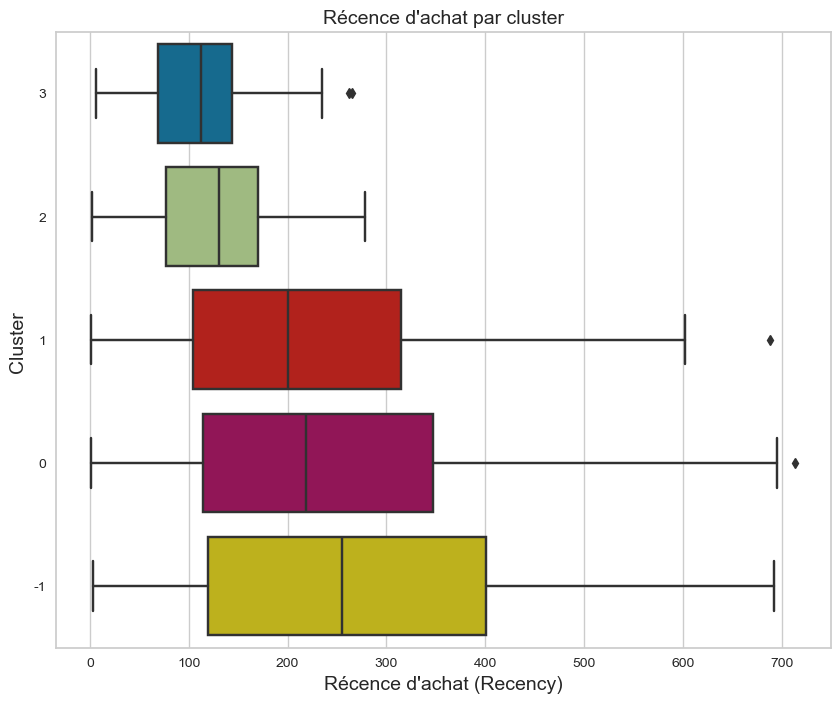

In [90]:
# Boxplot de la Récence par cluster
ordre_cluster = ds_rfmr.groupby('Cluster')['Recency'].median().sort_values().index
plt.figure(figsize=(10,8))
plt.title("Récence d'achat par cluster", fontsize=14)
sns.boxplot(x=ds_rfmr['Recency'], 
            y=ds_rfmr['Cluster'], 
            showfliers=True,
            orient='h', 
            order=ordre_cluster,
            data=ds_rfmr)
plt.xlabel("Récence d'achat (Recency)",fontsize=14)
plt.ylabel('Cluster ',fontsize=14)
plt.show()

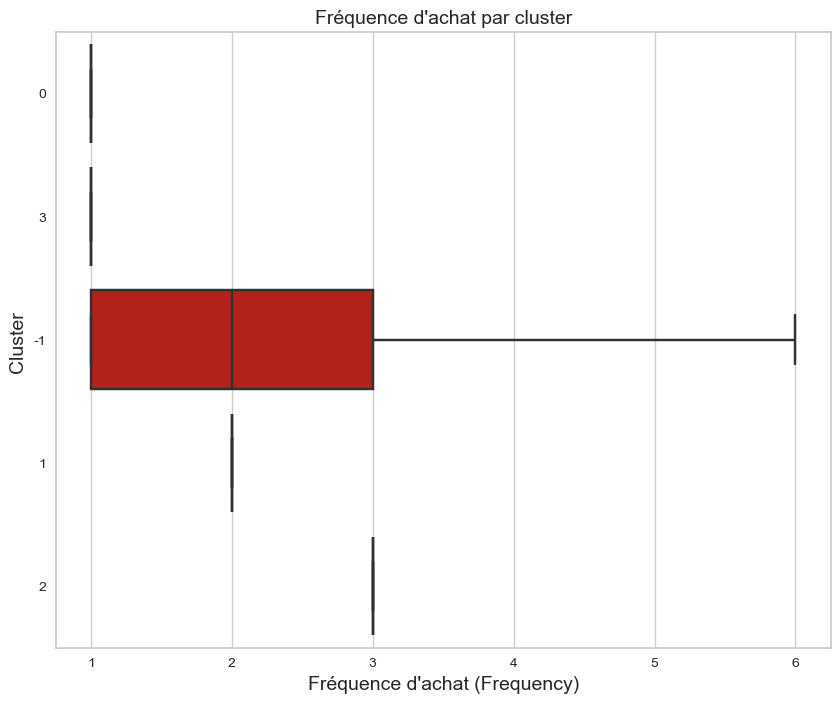

In [91]:
# Boxplot de la Fréquence par cluster
ordre_cluster = ds_rfmr.groupby('Cluster')['Frequency'].median().sort_values().index
plt.figure(figsize=(10,8))
plt.title("Fréquence d'achat par cluster", fontsize=14)
sns.boxplot(x=ds_rfmr['Frequency'], 
            y=ds_rfmr['Cluster'], 
            showfliers=False,
            orient='h', 
            order=ordre_cluster,
            data=ds_rfmr)
plt.xlabel("Fréquence d'achat (Frequency)",fontsize=14)
plt.ylabel('Cluster ',fontsize=14)
plt.show()

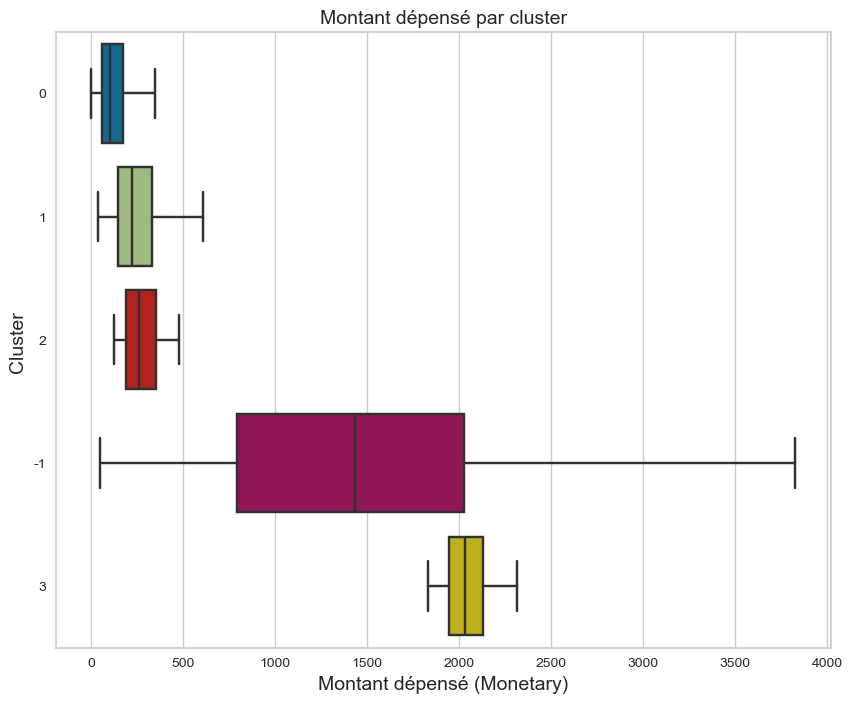

In [92]:
# Boxplot du Montant dépensé par cluster

ordre_cluster = ds_rfmr.groupby('Cluster')['Monetary'].median().sort_values().index
plt.figure(figsize=(10,8))
plt.title("Montant dépensé par cluster", fontsize=14)
sns.boxplot(x=ds_rfmr['Monetary'], 
            y=ds_rfmr['Cluster'], 
            showfliers=False,
            orient='h', 
            order=ordre_cluster,
            data=ds_rfmr)
plt.xlabel('Montant dépensé (Monetary)',fontsize=14)
plt.ylabel('Cluster ',fontsize=14)
plt.show()# Boxplot du Montant dépensé par cluster

## Comparaison des moyennes

In [93]:
# Regroupement des données par cluster et calcul des moyennes
cluster_means = ds_rfmr.groupby('Cluster').mean()

# Affichage des moyennes de chaque caractéristique pour chaque cluster
cluster_means

,Recency,Frequency,Monetary,review
Cluster,,,,
-1,268.591973,1.924749,1565.125502,3.370420
0,238.279577,1.000000,152.249756,4.155565
1,218.523534,2.000000,260.061957,4.242086
2,124.132353,3.000000,272.228971,4.686275
3,110.380282,1.000000,2039.720704,4.830986


In [94]:


clusters = ds_rfmr['Cluster'].unique()

# Creation d'un DataFrame vide pour stocker les résultats
results_monetary = pd.DataFrame(columns=['Cluster1', 'Cluster2', 'Mean1', 'Mean2', 'T-score_monetary', 'p-value'])

for i in range(len(clusters)):
    for j in range(i+1, len(clusters)):
        # obtention des données de la variable Monetary pour chaque cluster
        cluster_data_i = ds_rfmr[ds_rfmr['Cluster'] == clusters[i]]['Monetary']
        cluster_data_j = ds_rfmr[ds_rfmr['Cluster'] == clusters[j]]['Monetary']
        
        # Test de student
        t_score, p_value = ttest_ind(cluster_data_i, cluster_data_j)
        
        # Calcul des moyennes
        mean_i = cluster_data_i.mean()
        mean_j = cluster_data_j.mean()
        
        # Adjout des résultats au DataFrame
        results_monetary.loc[len(results_monetary)] = [clusters[i], clusters[j], mean_i.round(), mean_j.round(), t_score.round(), p_value.round(2)]


results_monetary

,Cluster1,Cluster2,Mean1,Mean2,T-score_monetary,p-value
0,0.0,1.0,152.0,260.0,-32.0,0.00
1,0.0,-1.0,152.0,1565.0,-182.0,0.00
2,0.0,3.0,152.0,2040.0,-96.0,0.00
3,0.0,2.0,152.0,272.0,-6.0,0.00
4,1.0,-1.0,260.0,1565.0,-54.0,0.00
5,1.0,3.0,260.0,2040.0,-95.0,0.00
6,1.0,2.0,260.0,272.0,-1.0,0.52
7,-1.0,3.0,1565.0,2040.0,-3.0,0.00
8,-1.0,2.0,1565.0,272.0,9.0,0.00
9,3.0,2.0,2040.0,272.0,96.0,0.00


In [95]:

clusters = ds_rfmr['Cluster'].unique()

# Creation d'un DataFrame vide pour stocker les résultats
results_Frequency = pd.DataFrame(columns=['Cluster1', 'Cluster2', 'Mean1', 'Mean2', 'T-score_Frequency', 'p-value'])

for i in range(len(clusters)):
    for j in range(i+1, len(clusters)):
        # obtention des données de la variable Monetary pour chaque cluster
        cluster_data_i = ds_rfmr[ds_rfmr['Cluster'] == clusters[i]]['Frequency']
        cluster_data_j = ds_rfmr[ds_rfmr['Cluster'] == clusters[j]]['Frequency']
        
        # Test de student
        t_score, p_value = ttest_ind(cluster_data_i, cluster_data_j)
        
        # Calcul des moyennes
        mean_i = cluster_data_i.mean()
        mean_j = cluster_data_j.mean()
        
        # ajout des résultats au DataFrame
        results_Frequency.loc[len(results_Frequency)] = [clusters[i], clusters[j], mean_i.round(), mean_j.round(), t_score.round(), p_value.round(2)]


results_Frequency

,Cluster1,Cluster2,Mean1,Mean2,T-score_Frequency,p-value
0,0.0,1.0,1.0,2.0,-inf,0.0
1,0.0,-1.0,1.0,2.0,-217.0,0.0
2,0.0,3.0,1.0,1.0,NaN,NaN
3,0.0,2.0,1.0,3.0,-inf,0.0
4,1.0,-1.0,2.0,2.0,3.0,0.0
5,1.0,3.0,2.0,1.0,inf,0.0
6,1.0,2.0,2.0,3.0,-inf,0.0
7,-1.0,3.0,2.0,1.0,6.0,0.0
8,-1.0,2.0,2.0,3.0,-7.0,0.0
9,3.0,2.0,1.0,3.0,-inf,0.0


In [96]:

clusters = ds_rfmr['Cluster'].unique()

# Creation d'un DataFrame vide pour stocker les résultats
results_Recency = pd.DataFrame(columns=['Cluster1', 'Cluster2', 'Mean1', 'Mean2', 'T-score_Recency', 'p-value'])

for i in range(len(clusters)):
    for j in range(i+1, len(clusters)):
        # obtention des données de la variable Monetary pour chaque cluster
        cluster_data_i = ds_rfmr[ds_rfmr['Cluster'] == clusters[i]]['Recency']
        cluster_data_j = ds_rfmr[ds_rfmr['Cluster'] == clusters[j]]['Recency']
        
         # Test de student
        t_score, p_value = ttest_ind(cluster_data_i, cluster_data_j)
        
        # Calcul des moyennes
        mean_i = cluster_data_i.mean()
        mean_j = cluster_data_j.mean()
        
        # ajout des résultats au DataFrame
        results_Recency.loc[len(results_Recency)] = [clusters[i], clusters[j], mean_i.round(), mean_j.round(), t_score.round(), p_value.round(2)]


results_Recency

,Cluster1,Cluster2,Mean1,Mean2,T-score_Recency,p-value
0,0.0,1.0,238.0,219.0,6.0,0.00
1,0.0,-1.0,238.0,269.0,-5.0,0.00
2,0.0,3.0,238.0,110.0,7.0,0.00
3,0.0,2.0,238.0,124.0,6.0,0.00
4,1.0,-1.0,219.0,269.0,-7.0,0.00
5,1.0,3.0,219.0,110.0,6.0,0.00
6,1.0,2.0,219.0,124.0,5.0,0.00
7,-1.0,3.0,269.0,110.0,8.0,0.00
8,-1.0,2.0,269.0,124.0,7.0,0.00
9,3.0,2.0,110.0,124.0,-1.0,0.22


In [97]:

clusters = ds_rfmr['Cluster'].unique()

# Creation d'un DataFrame vide pour stocker les résultats
results_review = pd.DataFrame(columns=['Cluster1', 'Cluster2', 'Mean1', 'Mean2', 'T-score_review', 'p-value'])

for i in range(len(clusters)):
    for j in range(i+1, len(clusters)):
        # obtention des données de la variable Monetary pour chaque cluster
        cluster_data_i = ds_rfmr[ds_rfmr['Cluster'] == clusters[i]]['review']
        cluster_data_j = ds_rfmr[ds_rfmr['Cluster'] == clusters[j]]['review']
        
        # Test de student
        t_score, p_value = ttest_ind(cluster_data_i, cluster_data_j)
        
        # Calcul des moyennes
        mean_i = cluster_data_i.mean()
        mean_j = cluster_data_j.mean()
        
        # ajout des résultats au DataFrame
        results_review.loc[len(results_review)] = [clusters[i], clusters[j], mean_i.round(), mean_j.round(), t_score.round(), p_value.round(2)]


results_review

,Cluster1,Cluster2,Mean1,Mean2,T-score_review,p-value
0,0.0,1.0,4.0,4.0,-3.0,0.00
1,0.0,-1.0,4.0,3.0,15.0,0.00
2,0.0,3.0,4.0,5.0,-4.0,0.00
3,0.0,2.0,4.0,5.0,-3.0,0.00
4,1.0,-1.0,4.0,3.0,16.0,0.00
5,1.0,3.0,4.0,5.0,-5.0,0.00
6,1.0,2.0,4.0,5.0,-4.0,0.00
7,-1.0,3.0,3.0,5.0,-8.0,0.00
8,-1.0,2.0,3.0,5.0,-7.0,0.00
9,3.0,2.0,5.0,5.0,2.0,0.04


## Histogrammes

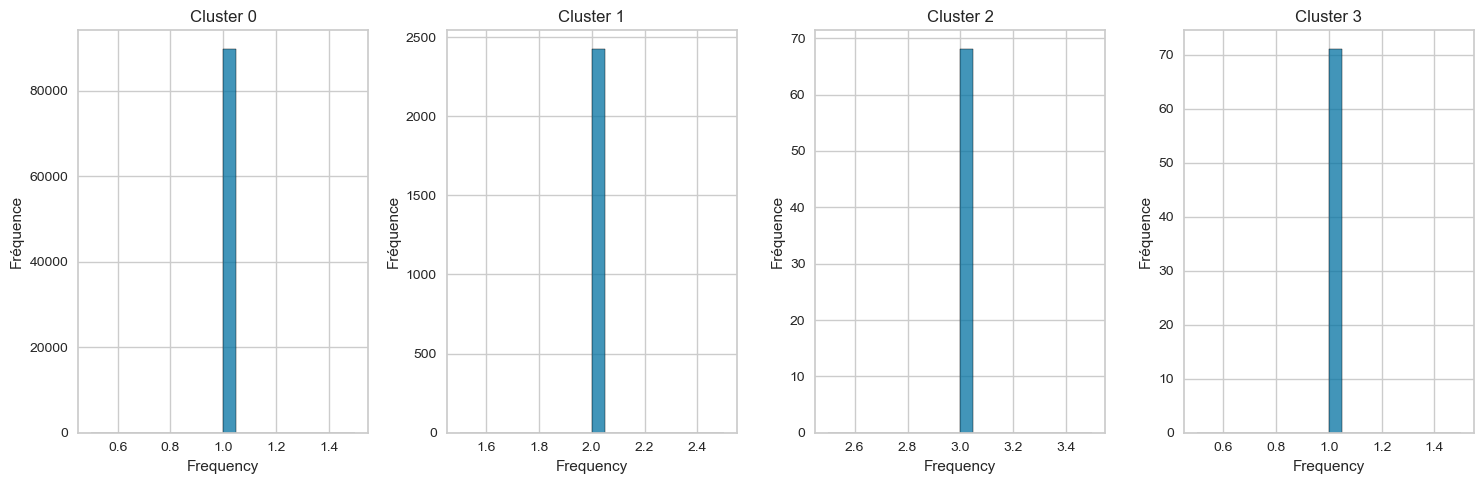

In [98]:
# Sélection de la caractéristique à visualiser
feature = 'Frequency'
n_clusters = 4  # Nombre de clusters

# Création de la grille de sous-graphiques
fig, axes = plt.subplots(nrows=1, ncols=n_clusters, figsize=(15, 5))

# Parcours de chaque cluster
for j in range(n_clusters):
    # Filtrer le jeu de données pour le cluster spécifique
    cluster_data = ds_rfmr[ds_rfmr['Cluster'] == j]
    
    # Tracer l'histogramme pour la caractéristique et le cluster spécifiques
    sns.histplot(cluster_data[feature], bins=20, ax=axes[j])
    
    # Ajouter un titre pour chaque sous-graphique
    axes[j].set_title(f'Cluster {j}')
    axes[j].set_xlabel(feature)
    axes[j].set_ylabel('Fréquence')


plt.tight_layout()
plt.show()

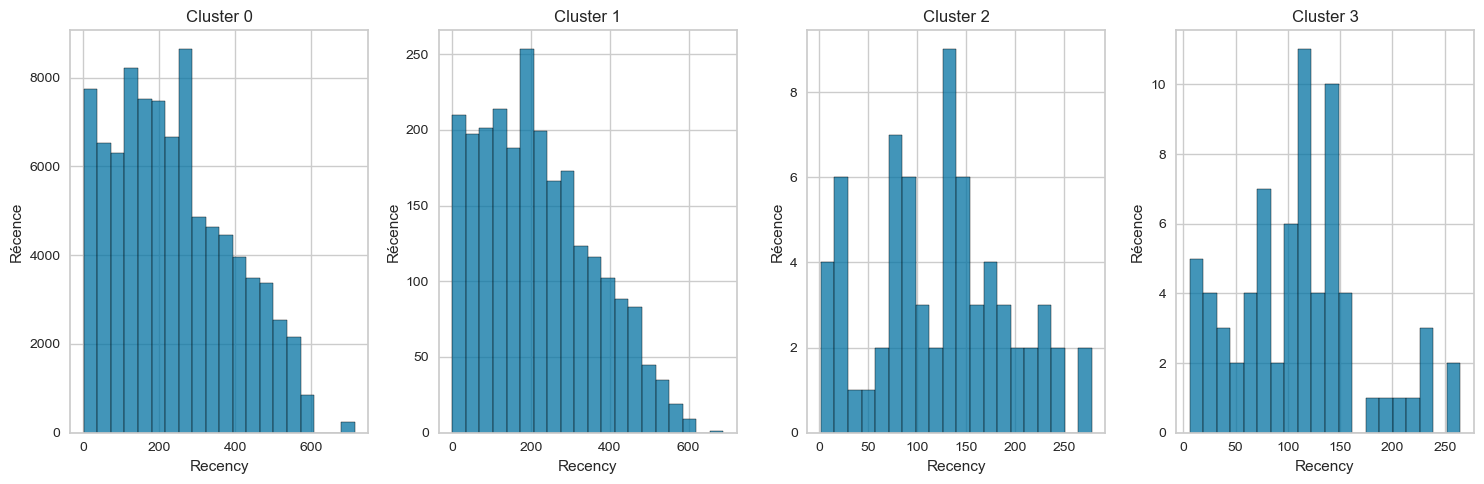

In [99]:
# Sélection de la caractéristique à visualiser
feature = 'Recency'
n_clusters = 4  # Nombre de clusters

# Création de la grille de sous-graphiques
fig, axes = plt.subplots(nrows=1, ncols=n_clusters, figsize=(15, 5))

# Parcours de chaque cluster
for j in range(n_clusters):
    # Filtrer le jeu de données pour le cluster spécifique
    cluster_data = ds_rfmr[ds_rfmr['Cluster'] == j]
    
    # Tracer l'histogramme pour la caractéristique et le cluster spécifiques
    sns.histplot(cluster_data[feature], bins=20, ax=axes[j])
    
    # Ajouter un titre pour chaque sous-graphique
    axes[j].set_title(f'Cluster {j}')
    axes[j].set_xlabel(feature)
    axes[j].set_ylabel('Récence')


plt.tight_layout()
plt.show()

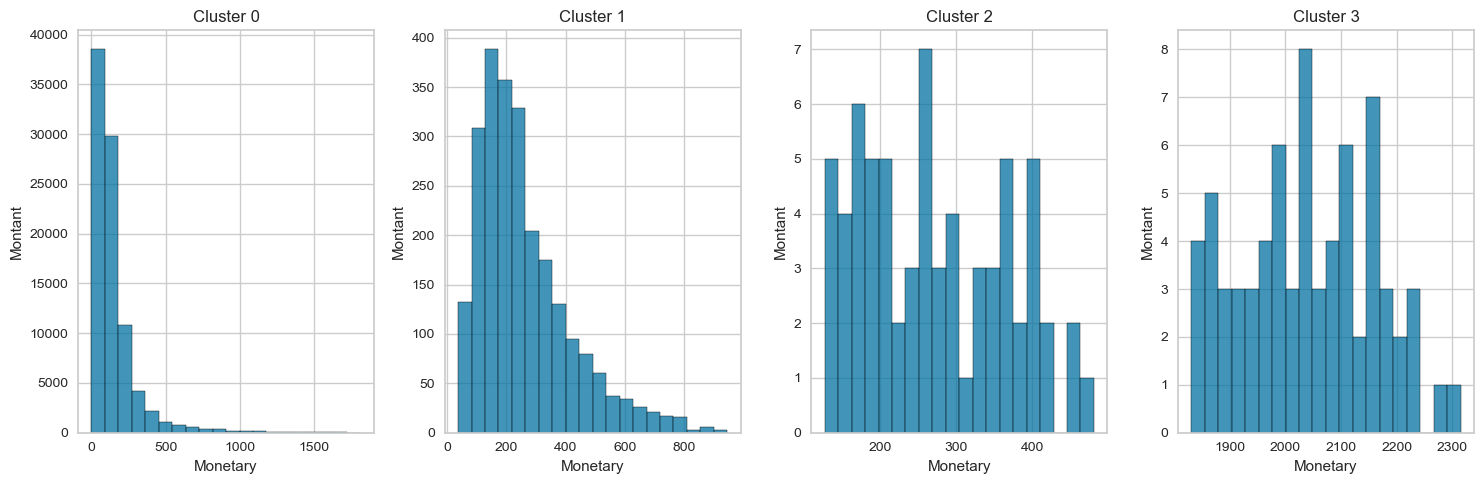

In [100]:
# Sélection de la caractéristique à visualiser
feature = 'Monetary'
n_clusters = 4  # Nombre de clusters

# Création de la grille de sous-graphiques
fig, axes = plt.subplots(nrows=1, ncols=n_clusters, figsize=(15, 5))

# Parcours de chaque cluster
for j in range(n_clusters):
    # Filtrer le jeu de données pour le cluster spécifique
    cluster_data = ds_rfmr[ds_rfmr['Cluster'] == j]
    
    # Tracer l'histogramme pour la caractéristique et le cluster spécifiques
    sns.histplot(cluster_data[feature], bins=20, ax=axes[j])
    
    # Ajouter un titre pour chaque sous-graphique
    axes[j].set_title(f'Cluster {j}')
    axes[j].set_xlabel(feature)
    axes[j].set_ylabel('Montant')


plt.tight_layout()
plt.show()

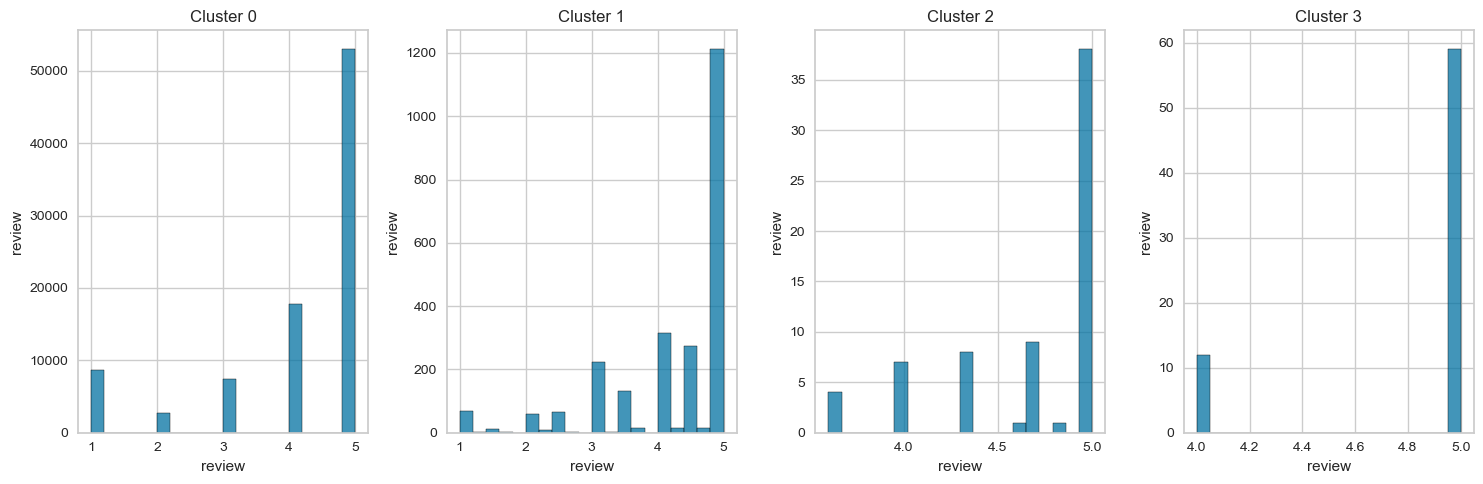

In [101]:
# Sélection de la caractéristique à visualiser
feature = 'review'
n_clusters = 4  # Nombre de clusters

# Création de la grille de sous-graphiques
fig, axes = plt.subplots(nrows=1, ncols=n_clusters, figsize=(15, 5))

# Parcours de chaque cluster
for j in range(n_clusters):
    # Filtrer le jeu de données pour le cluster spécifique
    cluster_data = ds_rfmr[ds_rfmr['Cluster'] == j]
    
    # Tracer l'histogramme pour la caractéristique et le cluster spécifiques
    sns.histplot(cluster_data[feature], bins=20, ax=axes[j])
    
    # Ajouter un titre pour chaque sous-graphique
    axes[j].set_title(f'Cluster {j}')
    axes[j].set_xlabel(feature)
    axes[j].set_ylabel('review')


plt.tight_layout()
plt.show()

## 3ème essai : données RFM avec localisation + KMEANS


In [102]:
ds_rfma = pd.read_csv('ds_rfm_w_review_w_state.csv')

In [103]:
ds_rfma = ds_rfma.drop(columns=['customer_unique_id','review'])

In [104]:
ds_rfma_clusterized = ds_rfma

## Standardisation des données

In [105]:


# Sélection des features  pour le clustering
X = ds_rfma[['Recency', 'Frequency', 'Monetary','area_type_campagne','area_type_ville']]

# Initialisation du scaler
scaler = StandardScaler()

# Normalisation des features
X_standardized = scaler.fit_transform(X)

# Création d'un nouveau DataFrame avec les features standardisées
ds_rfma = pd.DataFrame(X_standardized, columns=['Recency', 'Frequency', 'Monetary','area_type_campagne','area_type_ville'])


## Méthode du coude

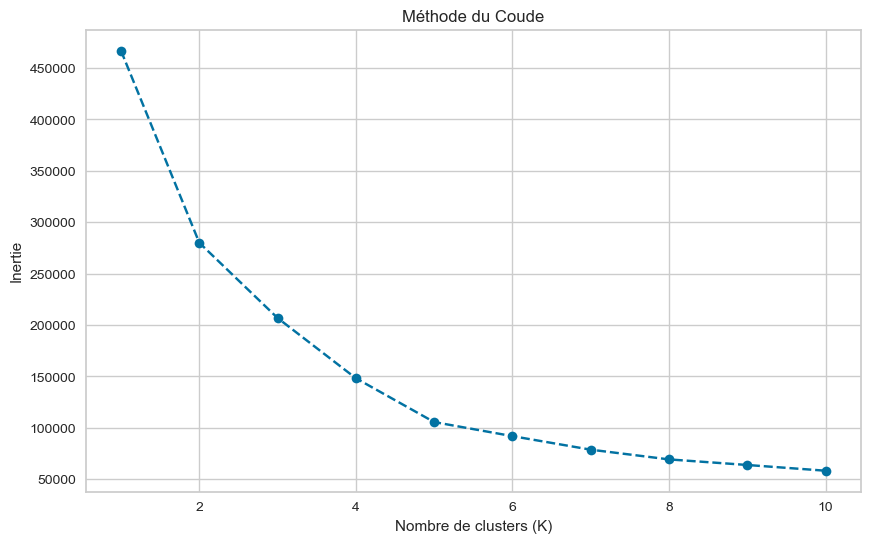

In [106]:
# Sélection des featuress pertinentes pour le clustering
X = ds_rfma[['Recency', 'Frequency', 'Monetary','area_type_campagne','area_type_ville']]

# Calcul de l'inertie pour différentes valeurs de K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Tracé de la courbe du coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie')
plt.title('Méthode du Coude')
plt.grid(True)
plt.show()

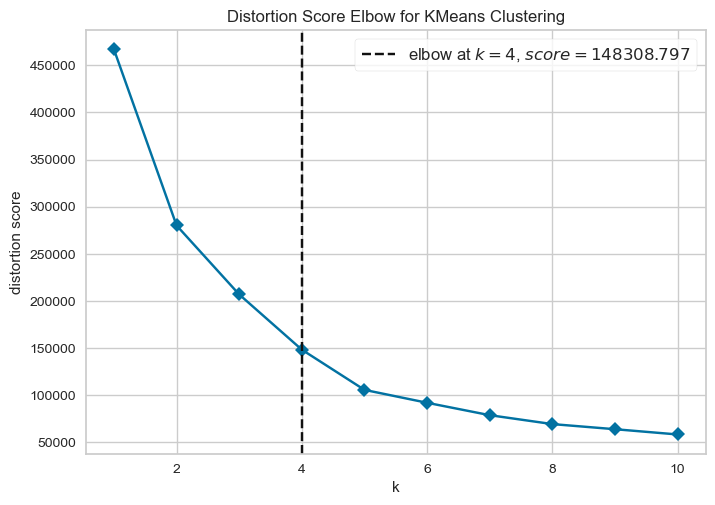

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [107]:
# Sélection des features pertinentes pour le clustering
X = ds_rfma[['Recency', 'Frequency', 'Monetary','area_type_campagne','area_type_ville']]

# Initialisation du  KMeans
model = KMeans(random_state=42)

# Tracer la courbe du coude pour déterminer le nombre optimal de clusters (K)
visualizer = KElbowVisualizer(model, k=(1, 11), timings=False)
visualizer.fit(X)
visualizer.show()

## Clustering ( 4 clusters )

In [108]:
# Initialisation du modèle KMeans avec 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42)

# Fit du modèle aux données
kmeans_4.fit(ds_rfma)

# Attribution des labels de cluster 
ds_rfma_clusterized['Cluster'] = kmeans_4.labels_


ds_rfma_clusterized

,Recency,Frequency,Monetary,area_type_campagne,area_type_ville,Cluster
0,112,1,141.90,True,False,0
1,115,1,27.19,True,False,0
2,537,1,86.22,True,False,3
3,321,1,43.62,True,False,3
4,288,1,196.89,True,False,3
...,...,...,...,...,...,...
93353,447,1,2067.42,True,False,3
93354,262,1,84.58,True,False,3
93355,568,1,112.46,True,False,3
93356,119,1,133.69,True,False,0


## Affichage des métriques

## Score silhouette

In [109]:
# Calcul du coefficient de silhouette
silhouette_avg_rfma = silhouette_score(ds_rfma, kmeans_4.labels_)

# Affichage du coefficient de silhouette moyen
print( silhouette_avg_rfma)

0.47537175595362235


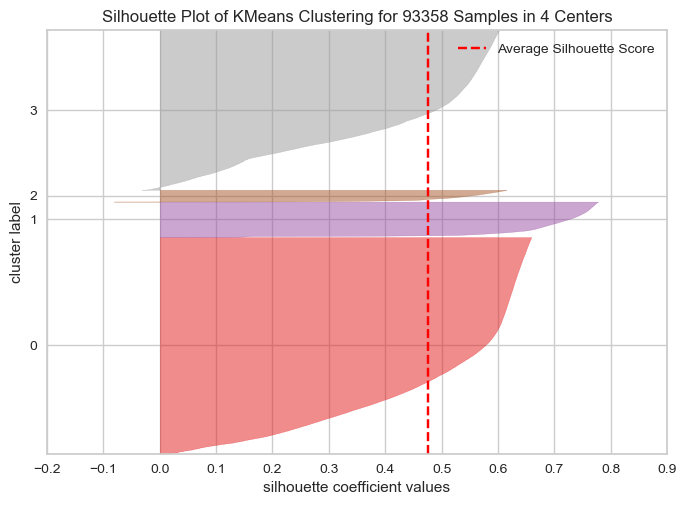

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 93358 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [110]:
visualizer = SilhouetteVisualizer(kmeans_4)
visualizer.fit(ds_rfma)   
visualizer.poof()

## Boxplots

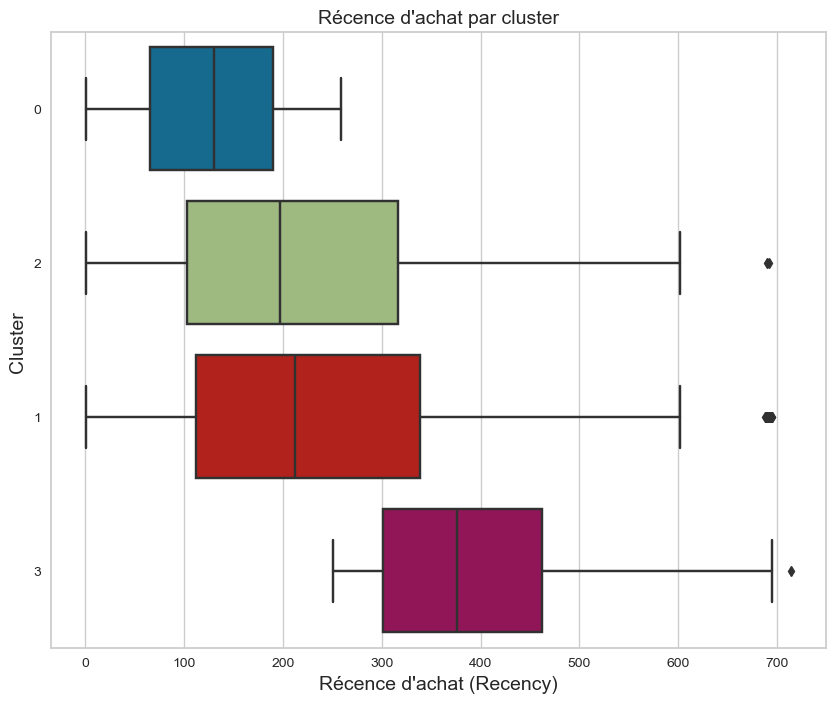

In [111]:
# Boxplot de la Récence par cluster
ordre_cluster = ds_rfma_clusterized.groupby('Cluster')['Recency'].median().sort_values().index
plt.figure(figsize=(10,8))
plt.title("Récence d'achat par cluster", fontsize=14)
sns.boxplot(x=ds_rfma_clusterized['Recency'], 
            y=ds_rfma_clusterized['Cluster'], 
            showfliers=True,
            orient='h', 
            order=ordre_cluster,
            data=ds_rfma_clusterized)
plt.xlabel("Récence d'achat (Recency)",fontsize=14)
plt.ylabel('Cluster ',fontsize=14)
plt.show()

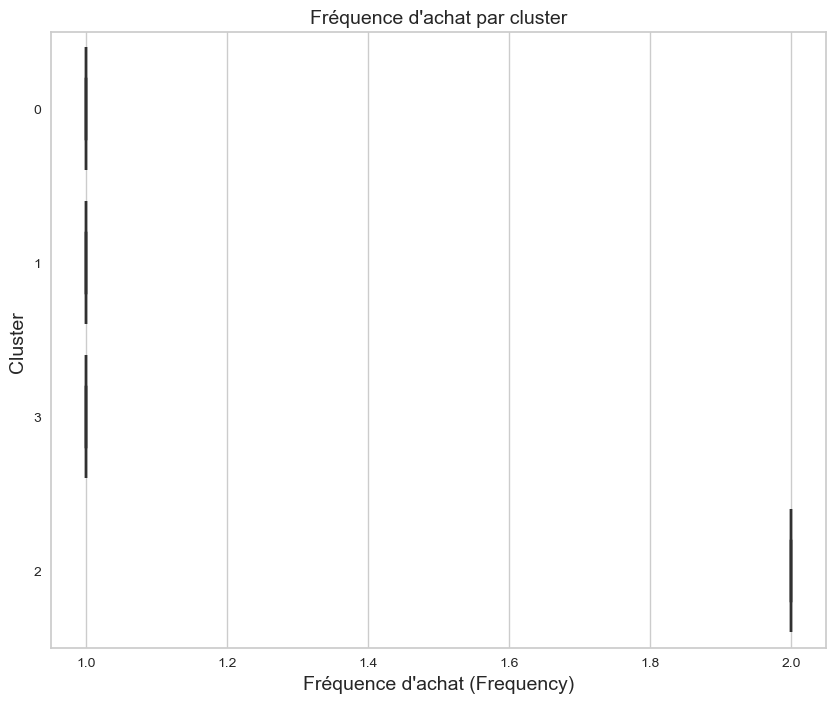

In [112]:
ordre_cluster = ds_rfma_clusterized.groupby('Cluster')['Frequency'].median().sort_values().index
plt.figure(figsize=(10,8))
plt.title("Fréquence d'achat par cluster", fontsize=14)
sns.boxplot(x=ds_rfma_clusterized['Frequency'], 
            y=ds_rfma_clusterized['Cluster'], 
            showfliers=False,
            orient='h', 
            order=ordre_cluster,
            data=ds_rfma_clusterized)
plt.xlabel("Fréquence d'achat (Frequency)",fontsize=14)
plt.ylabel('Cluster ',fontsize=14)
plt.show()

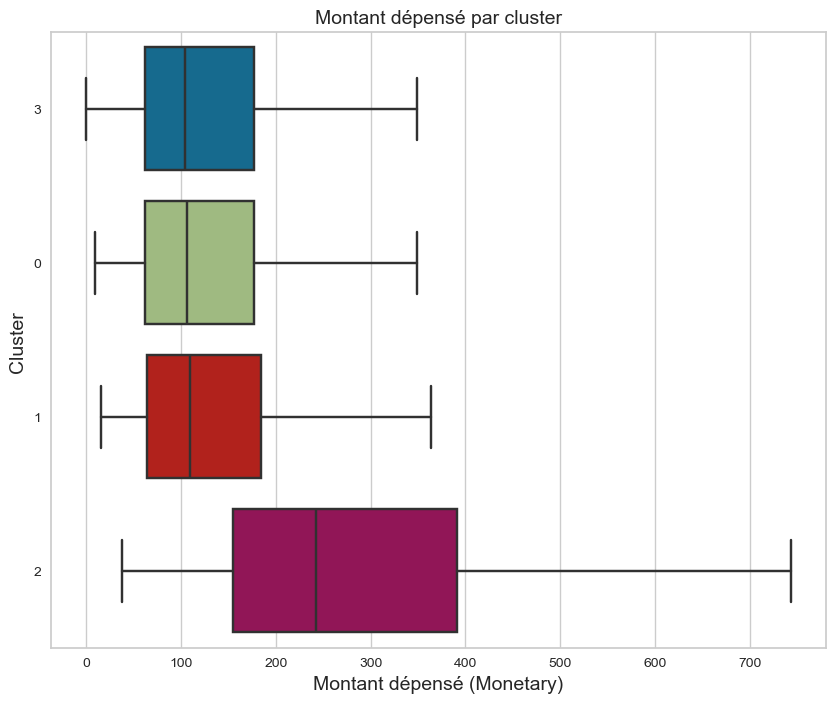

In [113]:
ordre_cluster = ds_rfma_clusterized.groupby('Cluster')['Monetary'].median().sort_values().index
plt.figure(figsize=(10,8))
plt.title("Montant dépensé par cluster", fontsize=14)
sns.boxplot(x=ds_rfma_clusterized['Monetary'], 
            y=ds_rfma_clusterized['Cluster'], 
            showfliers=False,
            orient='h', 
            order=ordre_cluster,
            data=ds_rfma_clusterized)
plt.xlabel('Montant dépensé (Monetary)',fontsize=14)
plt.ylabel('Cluster ',fontsize=14)
plt.show()

## Comparaison des moyennes

In [114]:
# Regroupement des données par cluster et calcul des moyennes
cluster_means_rfma = ds_rfma_clusterized.groupby('Cluster').mean().round()

# Affichage des moyennes de chaque caractéristique pour chaque cluster
cluster_means_rfma

,Recency,Frequency,Monetary,area_type_campagne,area_type_ville
Cluster,,,,,
0,129.0,1.0,158.0,1.0,0.0
1,234.0,1.0,165.0,0.0,1.0
2,218.0,2.0,366.0,1.0,0.0
3,388.0,1.0,161.0,1.0,0.0


Cluster 0 :

    Récence : Environ 129 jours depuis le dernier achat.
    Fréquence : En moyenne, chaque client a effectué un seul achat.
    Monétaire : La somme totale dépensée par les clients dans ce cluster est d'environ 158 reals.
    Provenance : 100% des clients proviennent de la campagne.
    Interprétation : "Clients récents ou occasionnels avec une dépense modérée, provenant de la campagne"

Cluster 1 :

    Récence : Environ 234 jours depuis le dernier achat.
    Fréquence : En moyenne, chaque client a effectué un seul achat.
    Monétaire : La somme totale dépensée par les clients dans ce cluster est d'environ 165 reals.
    Provenance : 100% des clients proviennent de la ville.
    Interprétation : "Clients inactifs ou occasionnels avec une dépense modérée, provenant de la ville"

Cluster 2 :

    Récence : Environ 218 jours depuis le dernier achat.
    Fréquence : En moyenne, chaque client a effectué deux achats.
    Monétaire : La somme totale dépensée par les clients dans ce cluster est d'environ 366 reals.
    Provenance : 100% des clients proviennent de la campagne.
    Interprétation : "Clients actifs et dépensiers, provenant de la campagne"

Cluster 3 :

    Récence : Environ 388 jours depuis le dernier achat.
    Fréquence : En moyenne, chaque client a effectué un seul achat.
    Monétaire : La somme totale dépensée par les clients dans ce cluster est d'environ 161 reals.
    Provenance : 100% des clients proviennent de la campagne.
    Interprétation : "Clients inactifs ou occasionnels avec une faible dépense, provenant de la campagne"

In [115]:
clusters = ds_rfma_clusterized['Cluster'].unique()

# Creation d'un DataFrame vide pour stocker les résultats
results_monetary = pd.DataFrame(columns=['Cluster1', 'Cluster2', 'Mean1', 'Mean2', 'T-score_monetary', 'p-value'])

for i in range(len(clusters)):
    for j in range(i+1, len(clusters)):
        # obtention des données de la variable Monetary pour chaque cluster
        cluster_data_i = ds_rfma_clusterized[ds_rfma_clusterized['Cluster'] == clusters[i]]['Monetary']
        cluster_data_j = ds_rfma_clusterized[ds_rfma_clusterized['Cluster'] == clusters[j]]['Monetary']
        
        # test de student
        t_score, p_value = ttest_ind(cluster_data_i, cluster_data_j)
        
        # Calcul des moyennes
        mean_i = cluster_data_i.mean()
        mean_j = cluster_data_j.mean()
        
        # Ajout des résultats au DataFrame
        results_monetary.loc[len(results_monetary)] = [clusters[i], clusters[j], mean_i.round(), mean_j.round(), t_score.round(), p_value.round(2)]


results_monetary

,Cluster1,Cluster2,Mean1,Mean2,T-score_monetary,p-value
0,0.0,3.0,158.0,161.0,-2.0,0.04
1,0.0,1.0,158.0,165.0,-3.0,0.01
2,0.0,2.0,158.0,366.0,-44.0,0.00
3,3.0,1.0,161.0,165.0,-1.0,0.17
4,3.0,2.0,161.0,366.0,-40.0,0.00
5,1.0,2.0,165.0,366.0,-26.0,0.00


In [116]:
clusters = ds_rfma_clusterized['Cluster'].unique()

# Creation d'un DataFrame vide pour stocker les résultats
results_Frequency = pd.DataFrame(columns=['Cluster1', 'Cluster2', 'Mean1', 'Mean2', 'T-score_Frequency', 'p-value'])

for i in range(len(clusters)):
    for j in range(i+1, len(clusters)):
        # obtention des données de la variable Monetary pour chaque cluster
        cluster_data_i = ds_rfma_clusterized[ds_rfma_clusterized['Cluster'] == clusters[i]]['Frequency']
        cluster_data_j = ds_rfma_clusterized[ds_rfma_clusterized['Cluster'] == clusters[j]]['Frequency']
        
        # test de student
        t_score, p_value = ttest_ind(cluster_data_i, cluster_data_j)
        
        # Calcul des moyennes
        mean_i = cluster_data_i.mean()
        mean_j = cluster_data_j.mean()
        
        # Ajout des résultats au DataFrame
        results_Frequency.loc[len(results_Frequency)] = [clusters[i], clusters[j], mean_i.round(), mean_j.round(), t_score.round(), p_value.round(2)]


results_Frequency

,Cluster1,Cluster2,Mean1,Mean2,T-score_Frequency,p-value
0,0.0,3.0,1.0,1.0,NaN,NaN
1,0.0,1.0,1.0,1.0,-37.0,0.0
2,0.0,2.0,1.0,2.0,-462.0,0.0
3,3.0,1.0,1.0,1.0,-31.0,0.0
4,3.0,2.0,1.0,2.0,-397.0,0.0
5,1.0,2.0,1.0,2.0,-161.0,0.0


In [117]:
clusters = ds_rfma_clusterized['Cluster'].unique()

# Creation d'un DataFrame vide pour stocker les résultats
results_Recency = pd.DataFrame(columns=['Cluster1', 'Cluster2', 'Mean1', 'Mean2', 'T-score_Recency', 'p-value'])

for i in range(len(clusters)):
    for j in range(i+1, len(clusters)):
         # obtention des données de la variable récence pour chaque cluster
        cluster_data_i = ds_rfma_clusterized[ds_rfma_clusterized['Cluster'] == clusters[i]]['Recency']
        cluster_data_j = ds_rfma_clusterized[ds_rfma_clusterized['Cluster'] == clusters[j]]['Recency']
        
        # test de student
        t_score, p_value = ttest_ind(cluster_data_i, cluster_data_j)
        
        # Calcul des moyennes
        mean_i = cluster_data_i.mean()
        mean_j = cluster_data_j.mean()
        
        # Ajout des résultats au DataFrame
        results_Recency.loc[len(results_Recency)] = [clusters[i], clusters[j], mean_i.round(), mean_j.round(), t_score.round(), p_value.round(2)]


results_Recency

,Cluster1,Cluster2,Mean1,Mean2,T-score_Recency,p-value
0,0.0,3.0,129.0,388.0,-444.0,0.0
1,0.0,1.0,129.0,234.0,-97.0,0.0
2,0.0,2.0,129.0,218.0,-57.0,0.0
3,3.0,1.0,388.0,234.0,114.0,0.0
4,3.0,2.0,388.0,218.0,84.0,0.0
5,1.0,2.0,234.0,218.0,4.0,0.0


## Histogrammes

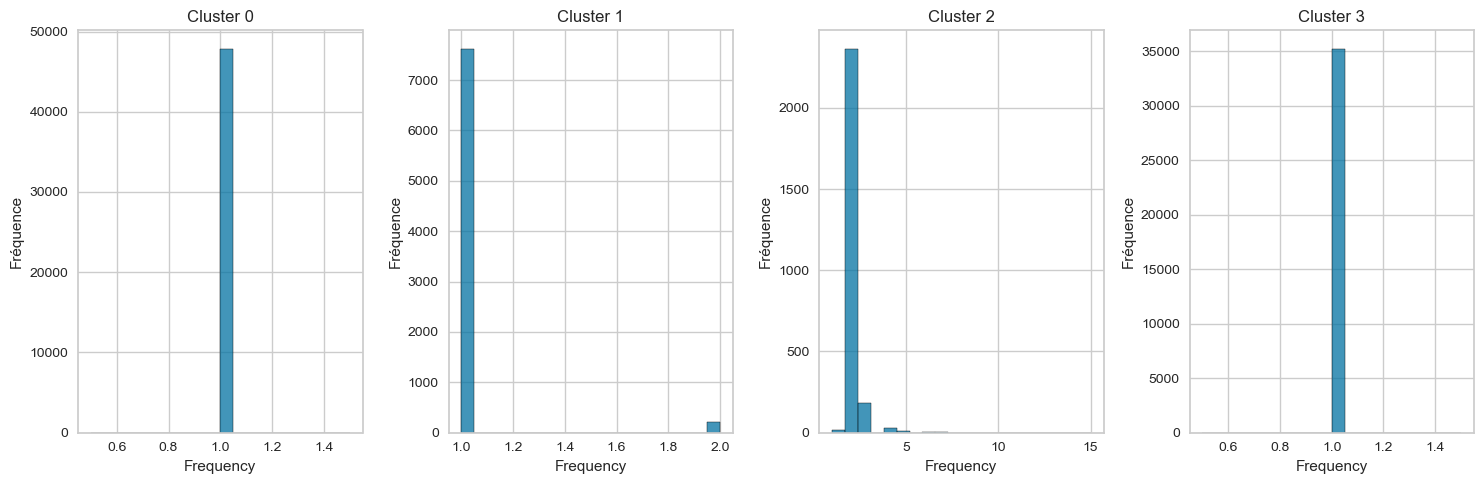

In [118]:
feature = 'Frequency'
n_clusters = 4  # Nombre de clusters

# Création de la grille de sous-graphiques
fig, axes = plt.subplots(nrows=1, ncols=n_clusters, figsize=(15, 5))

# Parcours de chaque cluster
for j in range(n_clusters):
    # Filtrer le jeu de données pour le cluster spécifique
    cluster_data = ds_rfma_clusterized[ds_rfma_clusterized['Cluster'] == j]
    
    # Tracer l'histogramme pour la caractéristique et le cluster spécifiques
    sns.histplot(cluster_data[feature], bins=20, ax=axes[j])
    
    # Ajouter un titre pour chaque sous-graphique
    axes[j].set_title(f'Cluster {j}')
    axes[j].set_xlabel(feature)
    axes[j].set_ylabel('Fréquence')

# Ajuster l'espacement entre les sous-graphiques pour éviter les chevauchements
plt.tight_layout()

# Afficher les graphiques
plt.show()

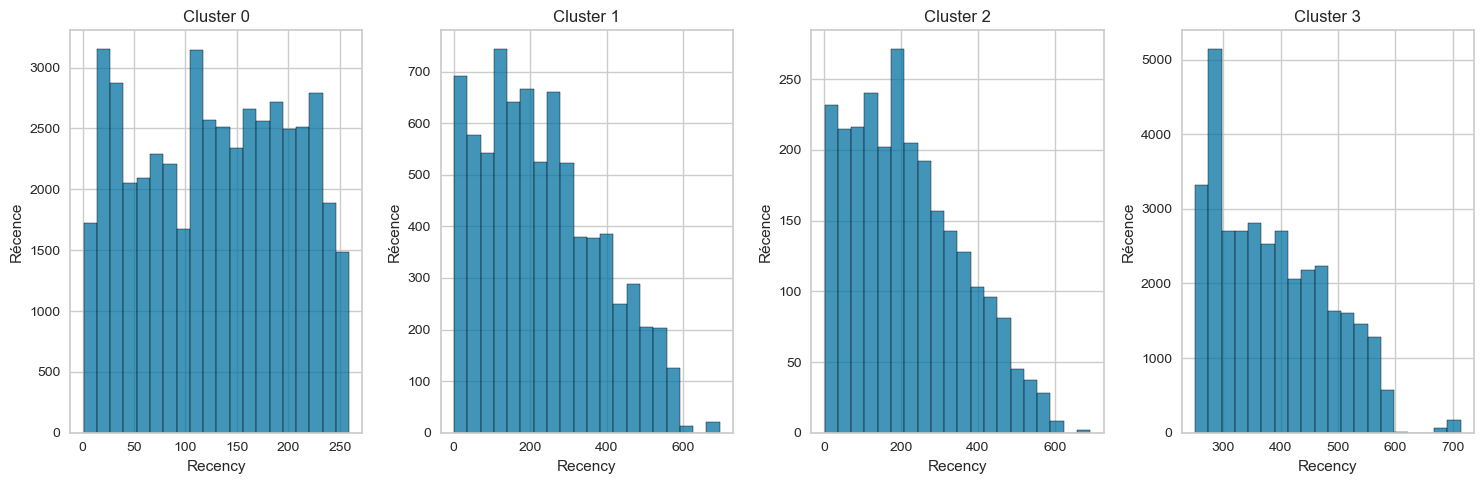

In [119]:
feature = 'Recency'
n_clusters = 4  # Nombre de clusters

# Création de la grille de sous-graphiques
fig, axes = plt.subplots(nrows=1, ncols=n_clusters, figsize=(15, 5))

# Parcours de chaque cluster
for j in range(n_clusters):
    # Filtrer le jeu de données pour le cluster spécifique
    cluster_data = ds_rfma_clusterized[ds_rfma_clusterized['Cluster'] == j]
    
    # Tracer l'histogramme pour la caractéristique et le cluster spécifiques
    sns.histplot(cluster_data[feature], bins=20, ax=axes[j])
    
    # Ajouter un titre pour chaque sous-graphique
    axes[j].set_title(f'Cluster {j}')
    axes[j].set_xlabel(feature)
    axes[j].set_ylabel('Récence')

# Ajuster l'espacement entre les sous-graphiques pour éviter les chevauchements
plt.tight_layout()

# Afficher les graphiques
plt.show()

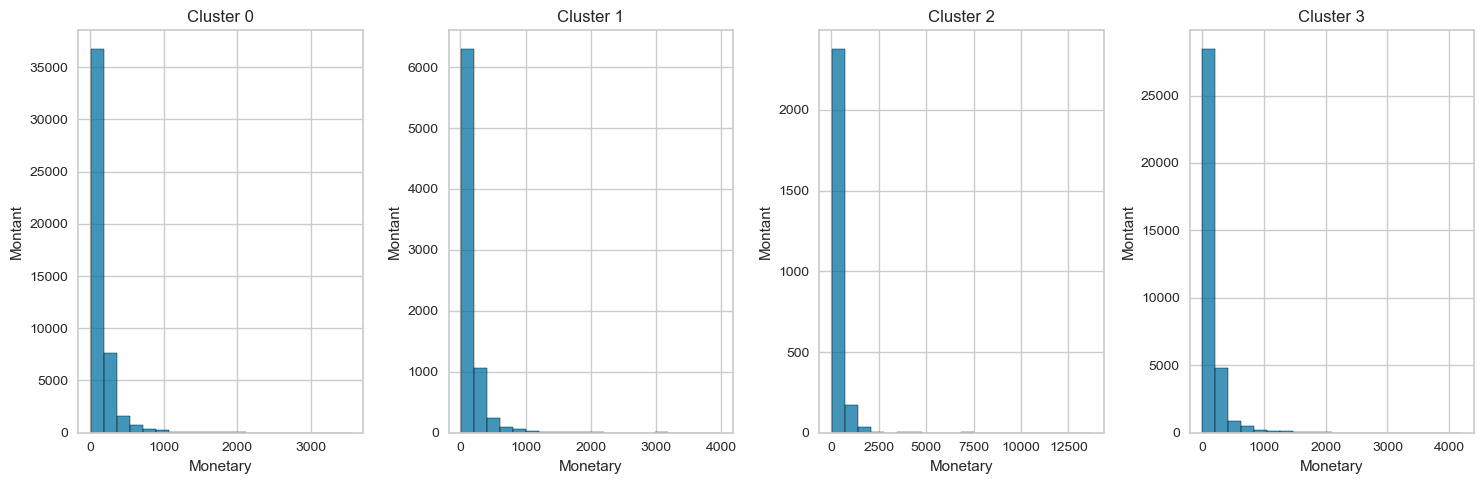

In [120]:
feature = 'Monetary'
n_clusters = 4  # Nombre de clusters

# Création de la grille de sous-graphiques
fig, axes = plt.subplots(nrows=1, ncols=n_clusters, figsize=(15, 5))

# Parcours de chaque cluster
for j in range(n_clusters):
    # Filtrer le jeu de données pour le cluster spécifique
    cluster_data = ds_rfma_clusterized[ds_rfma_clusterized['Cluster'] == j]
    
    # Tracer l'histogramme pour la caractéristique et le cluster spécifiques
    sns.histplot(cluster_data[feature], bins=20, ax=axes[j])
    
    # Ajouter un titre pour chaque sous-graphique
    axes[j].set_title(f'Cluster {j}')
    axes[j].set_xlabel(feature)
    axes[j].set_ylabel('Montant')

# Ajuster l'espacement entre les sous-graphiques pour éviter les chevauchements
plt.tight_layout()

# Afficher les graphiques
plt.show()

## 6ème essai : données RFM + localisation + DBSCAN

In [121]:
ds_rfma = pd.read_csv('ds_rfm_w_review_w_state.csv')

In [122]:
ds_rfma = ds_rfma.drop(columns=['review', 'customer_unique_id'])

## Création de quantiles pour échantillonage stratifié

In [123]:
#fonction pour créer des classes de quantiles

def create_quantile_classes(df, column, n_quantiles=20):
    """
    Crée des classes de quantiles pour une colonne donnée dans un DataFrame.

    Parameters:
    df (pandas.DataFrame): Le DataFrame contenant les données.
    column (str): Le nom de la colonne à transformer en quantiles.
    n_quantiles (int): Le nombre de quantiles à créer (par défaut 20).

    Returns:
    pandas.DataFrame: Le DataFrame avec une nouvelle colonne indiquant les classes de quantiles.
    """
    quantiles = pd.qcut(df[column], q=n_quantiles, duplicates='drop')
    labels = range(1, quantiles.nunique() + 1)
    df[column + '_quantile'] = pd.qcut(df[column], q=n_quantiles, labels=labels, duplicates='drop')
    return df

# Application de la fonction pour les colonnes RFM
ds_rfma = create_quantile_classes(ds_rfma, 'Recency')
ds_rfma = create_quantile_classes(ds_rfma, 'Frequency')
ds_rfma = create_quantile_classes(ds_rfma, 'Monetary')

# Échantillonnage stratifié
echantillon_stratifie = ds_rfma.groupby(
    ['Recency_quantile', 'Frequency_quantile', 'Monetary_quantile']
).apply(lambda x: x.sample(frac=0.5)).reset_index(drop=True)

echantillon_stratifie



,Recency,Frequency,Monetary,area_type_campagne,area_type_ville,Recency_quantile,Frequency_quantile,Monetary_quantile
0,11,1,24.79,True,False,1,1,1
1,9,1,22.34,False,True,1,1,1
2,18,1,32.13,True,False,1,1,1
3,10,1,28.69,True,False,1,1,1
4,21,1,29.43,True,False,1,1,1
...,...,...,...,...,...,...,...,...
46665,553,1,1146.20,True,False,20,1,20
46666,545,1,667.03,True,False,20,1,20
46667,545,1,1534.58,True,False,20,1,20
46668,564,1,753.54,True,False,20,1,20


In [124]:
columns_to_drop = (['Recency_quantile', 'Frequency_quantile', 'Monetary_quantile'])

ds_rfma.drop(columns=columns_to_drop, inplace=True)

In [125]:
ds_rfma

,Recency,Frequency,Monetary,area_type_campagne,area_type_ville
0,112,1,141.90,True,False
1,115,1,27.19,True,False
2,537,1,86.22,True,False
3,321,1,43.62,True,False
4,288,1,196.89,True,False
...,...,...,...,...,...
93353,447,1,2067.42,True,False
93354,262,1,84.58,True,False
93355,568,1,112.46,True,False
93356,119,1,133.69,True,False


In [126]:
echantillon_stratifie.drop(columns=columns_to_drop, inplace=True)

echantillon_stratifie

,Recency,Frequency,Monetary,area_type_campagne,area_type_ville
0,11,1,24.79,True,False
1,9,1,22.34,False,True
2,18,1,32.13,True,False
3,10,1,28.69,True,False
4,21,1,29.43,True,False
...,...,...,...,...,...
46665,553,1,1146.20,True,False
46666,545,1,667.03,True,False
46667,545,1,1534.58,True,False
46668,564,1,753.54,True,False


## Standardisation des données

In [127]:
# Séparation et Standardisation des données
X = echantillon_stratifie
std_scale = preprocessing.StandardScaler()
X_scaled=std_scale.fit_transform(X)

## Grid search

In [128]:
# Definition des valeurs d'epsilon à tester
epsilon_values = [0.1, 0.3, 0.5, 0.7, 0.9]


best_epsilon = None
best_silhouette_score = -1 

# Iteration sur les valeurs d'epsilon et calcul du score de silhouette
for epsilon in epsilon_values:
    dbscan = DBSCAN(eps=epsilon, min_samples=10)
    labels = dbscan.fit_predict(X_scaled)
    silhouette = silhouette_score(X_scaled, labels)
    
    print(f"Epsilon: {epsilon}, Silhouette Score: {silhouette}")
    
     #   Mise à jour de la meilleure valeur d'epsilon si le score de silhouette actuel est meilleur
    if silhouette > best_silhouette_score:
        best_epsilon = epsilon
        best_silhouette_score = silhouette

print(f"Best Epsilon: {best_epsilon}, Best Silhouette Score: {best_silhouette_score}")

Epsilon: 0.1, Silhouette Score: 0.19468985484512874
Epsilon: 0.3, Silhouette Score: 0.45074032305813255
Epsilon: 0.5, Silhouette Score: 0.47334773124172885
Epsilon: 0.7, Silhouette Score: 0.6959413775659257
Epsilon: 0.9, Silhouette Score: 0.6929150894394646
Best Epsilon: 0.7, Best Silhouette Score: 0.6959413775659257


In [129]:
# Definition des valeurs d'epsilon à tester
epsilon_values = [0.1, 0.3, 0.5, 0.7, 0.9]

# Initialisation des variables pour stocker les résultats
best_epsilon = None
best_silhouette_score = -1  

# Iteration sur les valeurs d'epsilon et calcul du score de silhouette
for epsilon in epsilon_values:
    dbscan = DBSCAN(eps=epsilon, min_samples=100)
    labels = dbscan.fit_predict(X_scaled)
    silhouette = silhouette_score(X_scaled, labels)
    
    print(f"Epsilon: {epsilon}, Silhouette Score: {silhouette}")
    
    #   Mise à jour de la meilleure valeur d'epsilon si le score de silhouette actuel est meilleur
    if silhouette > best_silhouette_score:
        best_epsilon = epsilon
        best_silhouette_score = silhouette

print(f"Best Epsilon: {best_epsilon}, Best Silhouette Score: {best_silhouette_score}")

Epsilon: 0.1, Silhouette Score: 0.042645862423839866
Epsilon: 0.3, Silhouette Score: 0.6756560293781766
Epsilon: 0.5, Silhouette Score: 0.6875609943519434
Epsilon: 0.7, Silhouette Score: 0.6960067218136894
Epsilon: 0.9, Silhouette Score: 0.6960147821205764
Best Epsilon: 0.9, Best Silhouette Score: 0.6960147821205764


In [130]:
# Definition des valeurs d'epsilon à tester
epsilon_values = [0.1, 0.3, 0.5, 0.7, 0.9]

# Initialisation des variables pour stocker les résultats
best_epsilon = None
best_silhouette_score = -1 

# Iteration sur les valeurs d'epsilon et calcul du score de silhouette
for epsilon in epsilon_values:
    dbscan = DBSCAN(eps=epsilon, min_samples=50)
    labels = dbscan.fit_predict(X_scaled)
    silhouette = silhouette_score(X_scaled, labels)
    
    print(f"Epsilon: {epsilon}, Silhouette Score: {silhouette}")
    
    #   Mise à jour de la meilleure valeur d'epsilon si le score de silhouette actuel est meilleur
    if silhouette > best_silhouette_score:
        best_epsilon = epsilon
        best_silhouette_score = silhouette

print(f"Best Epsilon: {best_epsilon}, Best Silhouette Score: {best_silhouette_score}")

Epsilon: 0.1, Silhouette Score: 0.5122447365498137
Epsilon: 0.3, Silhouette Score: 0.4307483862787679
Epsilon: 0.5, Silhouette Score: 0.48407236330848136
Epsilon: 0.7, Silhouette Score: 0.695029238245807
Epsilon: 0.9, Silhouette Score: 0.694792897901121
Best Epsilon: 0.7, Best Silhouette Score: 0.695029238245807


In [131]:
X = ds_rfma
std_scale = preprocessing.StandardScaler()
X_scaled=std_scale.fit_transform(X)

In [132]:
# valeurs optimales d'epsilon et de min_samples
best_epsilon = 0.7
min_samples = 10

# Initialisation de DBSCAN avec les meilleurs paramètres
dbscan = DBSCAN(eps=best_epsilon, min_samples=min_samples)

# Fit du modèle 
labels = dbscan.fit_predict(X_scaled)




print("Cluster Labels:", labels)


Cluster Labels: [0 0 0 ... 0 0 0]


## Affichage des métriques

## Score silhouette

In [133]:
silhouette_avg_dbscan_rfma = silhouette_score(X_scaled, labels)
print (silhouette_avg_dbscan_rfma )

0.7093887988158177


In [134]:
ds_rfma['Cluster'] = labels

In [135]:
ds_rfma['Cluster'].unique()

array([ 0,  1,  2,  3, -1,  4,  5], dtype=int64)

## Boxplots

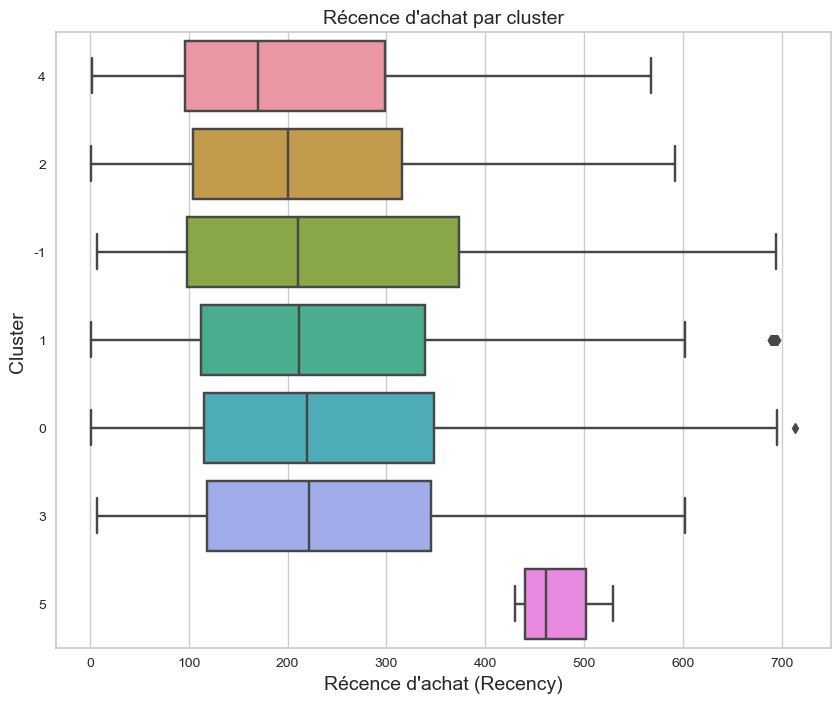

In [136]:
# Boxplot de la Récence par cluster
ordre_cluster = ds_rfma.groupby('Cluster')['Recency'].median().sort_values().index
plt.figure(figsize=(10,8))
plt.title("Récence d'achat par cluster", fontsize=14)
sns.boxplot(x=ds_rfma['Recency'], 
            y=ds_rfma['Cluster'], 
            showfliers=True,
            orient='h', 
            order=ordre_cluster,
            data=ds_rfma)
plt.xlabel("Récence d'achat (Recency)",fontsize=14)
plt.ylabel('Cluster ',fontsize=14)
plt.show()

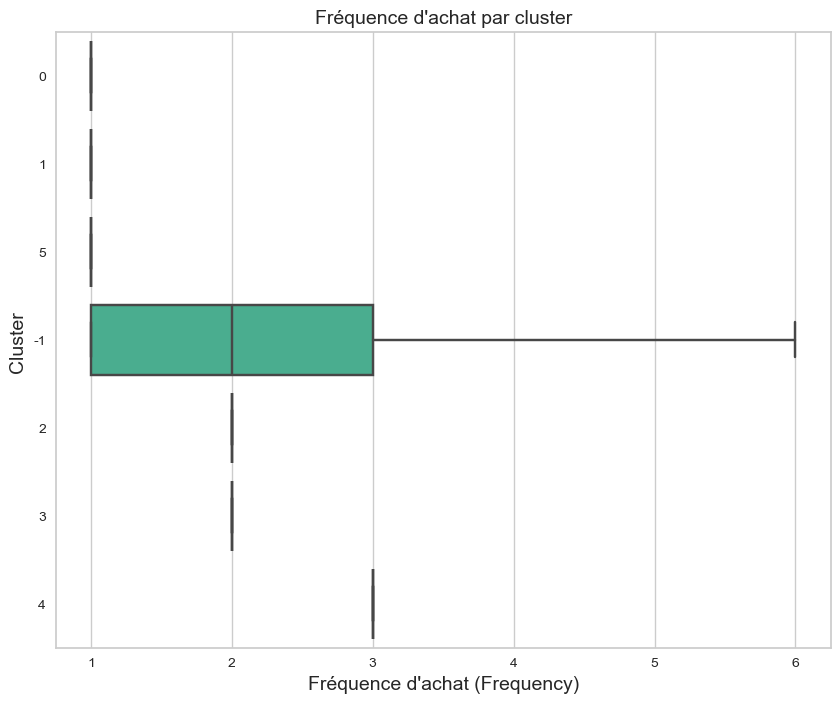

In [137]:
ordre_cluster = ds_rfma.groupby('Cluster')['Frequency'].median().sort_values().index
plt.figure(figsize=(10,8))
plt.title("Fréquence d'achat par cluster", fontsize=14)
sns.boxplot(x=ds_rfma['Frequency'], 
            y=ds_rfma['Cluster'], 
            showfliers=False,
            orient='h', 
            order=ordre_cluster,
            data=ds_rfma)
plt.xlabel("Fréquence d'achat (Frequency)",fontsize=14)
plt.ylabel('Cluster ',fontsize=14)
plt.show()

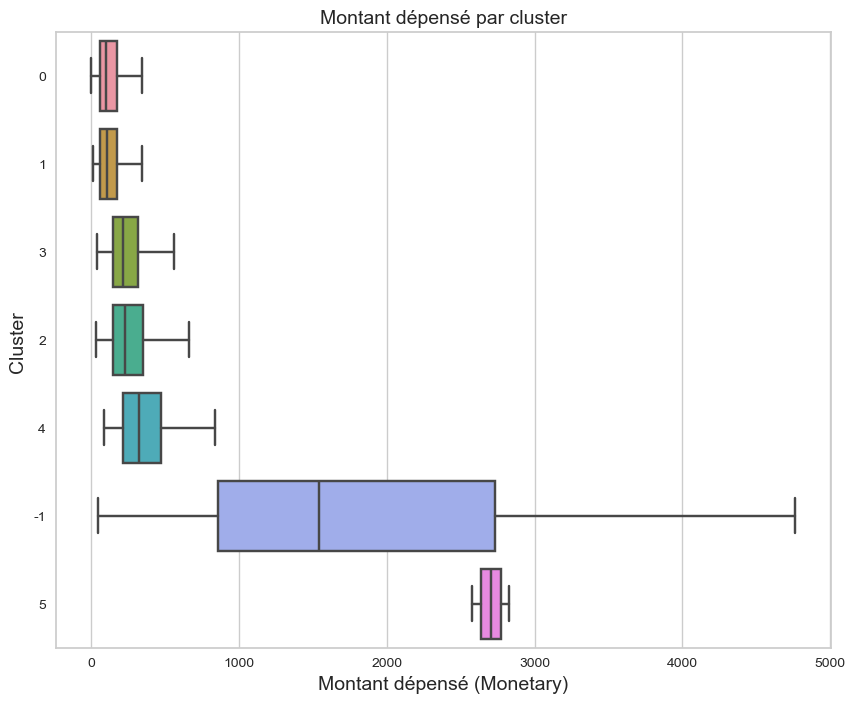

In [138]:
ordre_cluster = ds_rfma.groupby('Cluster')['Monetary'].median().sort_values().index
plt.figure(figsize=(10,8))
plt.title("Montant dépensé par cluster", fontsize=14)
sns.boxplot(x=ds_rfma['Monetary'], 
            y=ds_rfma['Cluster'], 
            showfliers=False,
            orient='h', 
            order=ordre_cluster,
            data=ds_rfma)
plt.xlabel('Montant dépensé (Monetary)',fontsize=14)
plt.ylabel('Cluster ',fontsize=14)
plt.show()# Boxplot du Montant dépensé par cluster

## Comparaison des moyennes

In [139]:
# Regroupement des données par cluster et calcul des moyennes
cluster_means = ds_rfma.groupby('Cluster').mean()

# Affichage des moyennes de chaque caractéristique pour chaque cluster
cluster_means

,Recency,Frequency,Monetary,area_type_campagne,area_type_ville
Cluster,,,,,
-1,254.004274,2.337607,1908.536709,0.653846,0.346154
0,238.890283,1.000000,158.093806,1.000000,0.000000
1,233.198282,1.000000,151.988019,0.000000,1.000000
2,219.169484,2.000000,285.631014,1.000000,0.000000
3,239.183962,2.000000,254.093632,0.000000,1.000000
4,197.881944,3.000000,363.359444,1.000000,0.000000
5,470.000000,1.000000,2706.107000,1.000000,0.000000


In [140]:
clusters = ds_rfma['Cluster'].unique()

# Creation d'un DataFrame vide pour stocker les résultats
results_monetary = pd.DataFrame(columns=['Cluster1', 'Cluster2', 'Mean1', 'Mean2', 'T-score_monetary', 'p-value'])

for i in range(len(clusters)):
    for j in range(i+1, len(clusters)):
        # obtention des données de la variable Monetary pour chaque cluster
        cluster_data_i = ds_rfma[ds_rfma['Cluster'] == clusters[i]]['Monetary']
        cluster_data_j = ds_rfma[ds_rfma['Cluster'] == clusters[j]]['Monetary']
        
        # Test de student
        t_score, p_value = ttest_ind(cluster_data_i, cluster_data_j)
        
        # Calcul des moyennes
        mean_i = cluster_data_i.mean()
        mean_j = cluster_data_j.mean()
        
        # Adjout des résultats au DataFrame
        results_monetary.loc[len(results_monetary)] = [clusters[i], clusters[j], mean_i.round(), mean_j.round(), t_score.round(), p_value.round(2)]


results_monetary

,Cluster1,Cluster2,Mean1,Mean2,T-score_monetary,p-value
0,0.0,1.0,158.0,152.0,3.0,0.01
1,0.0,2.0,158.0,286.0,-31.0,0.00
2,0.0,3.0,158.0,254.0,-7.0,0.00
3,0.0,-1.0,158.0,1909.0,-126.0,0.00
4,0.0,4.0,158.0,363.0,-13.0,0.00
5,0.0,5.0,158.0,2706.0,-41.0,0.00
6,1.0,2.0,152.0,286.0,-33.0,0.00
7,1.0,3.0,152.0,254.0,-9.0,0.00
8,1.0,-1.0,152.0,1909.0,-84.0,0.00
9,1.0,4.0,152.0,363.0,-16.0,0.00


In [141]:
clusters = ds_rfma['Cluster'].unique()

# Creation d'un DataFrame vide pour stocker les résultats
results_Frequency = pd.DataFrame(columns=['Cluster1', 'Cluster2', 'Mean1', 'Mean2', 'T-score_Frequency', 'p-value'])

for i in range(len(clusters)):
    for j in range(i+1, len(clusters)):
        # obtention des données de la variable Frequence pour chaque cluster
        cluster_data_i = ds_rfma[ds_rfma['Cluster'] == clusters[i]]['Frequency']
        cluster_data_j = ds_rfma[ds_rfma['Cluster'] == clusters[j]]['Frequency']
        
        # Test de student
        t_score, p_value = ttest_ind(cluster_data_i, cluster_data_j)
        
        # Calcul des moyennes
        mean_i = cluster_data_i.mean()
        mean_j = cluster_data_j.mean()
        
        # ajout des résultats au DataFrame
        results_Frequency.loc[len(results_Frequency)] = [clusters[i], clusters[j], mean_i.round(), mean_j.round(), t_score.round(), p_value.round(2)]


results_Frequency

,Cluster1,Cluster2,Mean1,Mean2,T-score_Frequency,p-value
0,0.0,1.0,1.0,1.0,NaN,NaN
1,0.0,2.0,1.0,2.0,-inf,0.00
2,0.0,3.0,1.0,2.0,-inf,0.00
3,0.0,-1.0,1.0,2.0,-227.0,0.00
4,0.0,4.0,1.0,3.0,-inf,0.00
5,0.0,5.0,1.0,1.0,NaN,NaN
6,1.0,2.0,1.0,2.0,-inf,0.00
7,1.0,3.0,1.0,2.0,-inf,0.00
8,1.0,-1.0,1.0,2.0,-69.0,0.00
9,1.0,4.0,1.0,3.0,-inf,0.00


In [144]:
clusters = ds_rfma['Cluster'].unique()

# Creation d'un DataFrame vide pour stocker les résultats
results_Recency = pd.DataFrame(columns=['Cluster1', 'Cluster2', 'Mean1', 'Mean2', 'T-score_Recency', 'p-value'])

for i in range(len(clusters)):
    for j in range(i+1, len(clusters)):
        # obtention des données de la variable Monetary pour chaque cluster
        cluster_data_i = ds_rfma[ds_rfma['Cluster'] == clusters[i]]['Recency']
        cluster_data_j = ds_rfma[ds_rfma['Cluster'] == clusters[j]]['Recency']
        
        # Test de student
        t_score, p_value = ttest_ind(cluster_data_i, cluster_data_j)
        
        # Calcul des moyennes
        mean_i = cluster_data_i.mean()
        mean_j = cluster_data_j.mean()
        
        # ajout des résultats au DataFrame
        results_Recency.loc[len(results_Recency)] = [clusters[i], clusters[j], mean_i.round(), mean_j.round(), t_score.round(), p_value.round(2)]


results_Recency

,Cluster1,Cluster2,Mean1,Mean2,T-score_Recency,p-value
0,0.0,1.0,239.0,233.0,3.0,0.00
1,0.0,2.0,239.0,219.0,6.0,0.00
2,0.0,3.0,239.0,239.0,-0.0,0.98
3,0.0,-1.0,239.0,254.0,-2.0,0.13
4,0.0,4.0,239.0,198.0,3.0,0.00
5,0.0,5.0,239.0,470.0,-5.0,0.00
6,1.0,2.0,233.0,219.0,4.0,0.00
7,1.0,3.0,233.0,239.0,-1.0,0.57
8,1.0,-1.0,233.0,254.0,-2.0,0.04
9,1.0,4.0,233.0,198.0,3.0,0.01


In [143]:
custom_colors = ['#a9a9a9', '#708090', '#778899', '#b0c4de', '#add8e6', '#4682b4', '#5f9ea0', '#6495ed']